<a href="https://colab.research.google.com/github/Aastha-Singh1/Aastha-Singh1/blob/main/Lead_Scoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from matplotlib.pyplot import xticks
%matplotlib inline

Data Preparation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
lead = pd.read_csv("/content/drive/MyDrive/Leadscoring/Lead Scoring.csv")
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [ ]:
word=pd.read_excel("/content/drive/MyDrive/Leadscoring/Leads Data Dictionary.xlsx")
word.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,NaN,Variables,Description
2,NaN,Prospect ID,A unique ID with which the customer is identif...
3,NaN,Lead Number,A lead number assigned to each lead procured.
4,NaN,Lead Origin,The origin identifier with which the customer ...


In [ ]:
pd.set_option('display.max_colwidth',None)
word.drop('Unnamed: 0',inplace=True,axis=1)
word.columns = word.iloc[1]
word = word.iloc[2:]
word.reset_index(drop=True, inplace=True)
word.head(len(word))

1,Variables,Description
0,Prospect ID,A unique ID with which the customer is identified.
1,Lead Number,A lead number assigned to each lead procured.
2,Lead Origin,"The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc."
3,Lead Source,"The source of the lead. Includes Google, Organic Search, Olark Chat, etc."
4,Do Not Email,An indicator variable selected by the customer wherein they select whether of not they want to be emailed about the course or not.
5,Do Not Call,An indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not.
6,Converted,The target variable. Indicates whether a lead has been successfully converted or not.
7,TotalVisits,The total number of visits made by the customer on the website.
8,Total Time Spent on Website,The total time spent by the customer on the website.
9,Page Views Per Visit,Average number of pages on the website viewed during the visits.


Duplicate Check

In [ ]:
lead_dub = lead.copy()
lead_dub.drop_duplicates(subset=None, inplace=True)
lead_dub.shape

(9240, 37)

In [ ]:
lead.shape

(9240, 37)

Data Inspection

In [ ]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [ ]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


Data Cleaning

In [ ]:
lead = lead.replace('Select', np.nan)
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [ ]:
lead.isnull().sum()

,0
Prospect ID,0
Lead Number,0
Lead Origin,0
Lead Source,36
Do Not Email,0
Do Not Call,0
Converted,0
TotalVisits,137
Total Time Spent on Website,0
Page Views Per Visit,137


In [ ]:
round(100*(lead.isnull().sum()/len(lead.index)), 2)

,0
Prospect ID,0.00
Lead Number,0.00
Lead Origin,0.00
Lead Source,0.39
Do Not Email,0.00
Do Not Call,0.00
Converted,0.00
TotalVisits,1.48
Total Time Spent on Website,0.00
Page Views Per Visit,1.48


In [ ]:
lead = lead.drop(lead.loc[:,list(round(100*(lead.isnull().sum()/len(lead.index)), 2)>60)].columns, axis=1)

In [ ]:
round(100*(lead.isnull().sum()/len(lead.index)), 2)

,0
Prospect ID,0.00
Lead Number,0.00
Lead Origin,0.00
Lead Source,0.39
Do Not Email,0.00
Do Not Call,0.00
Converted,0.00
TotalVisits,1.48
Total Time Spent on Website,0.00
Page Views Per Visit,1.48


In [ ]:
lead.drop(['Prospect ID', 'Lead Number'], axis=1, inplace = True)

In [ ]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Update me on Supply Chain Content,Get updates on DM Content,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,No,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [ ]:
lead['Lead Quality'].value_counts()

,count
Lead Quality,
Might be,1560
Not Sure,1092
High in Relevance,637
Worst,601
Low in Relevance,583


In [ ]:
lead['Lead Quality'].describe()

,Lead Quality
count,4473
unique,5
top,Might be
freq,1560


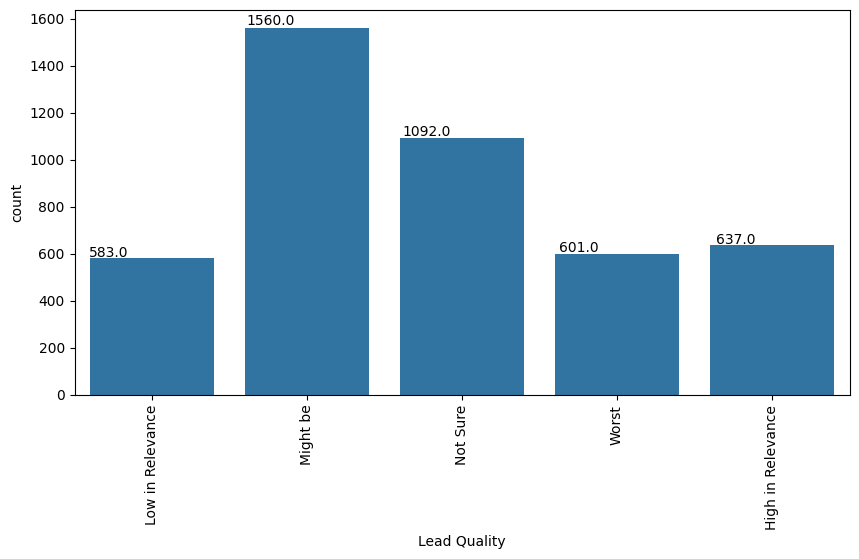

In [ ]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x=lead['Lead Quality'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
plt.show()

In [ ]:
lead['Lead Quality'] = lead['Lead Quality'].replace(np.nan, 'Not Sure')

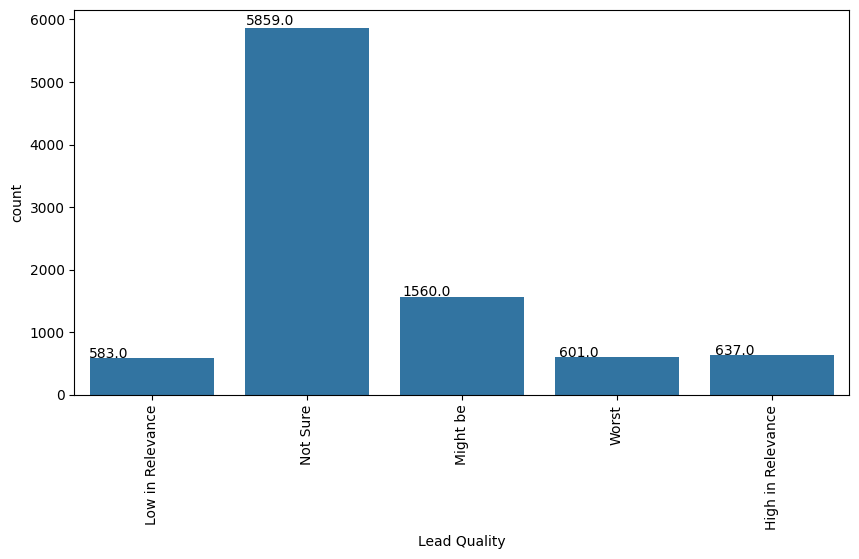

In [ ]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x=lead['Lead Quality'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
plt.show()

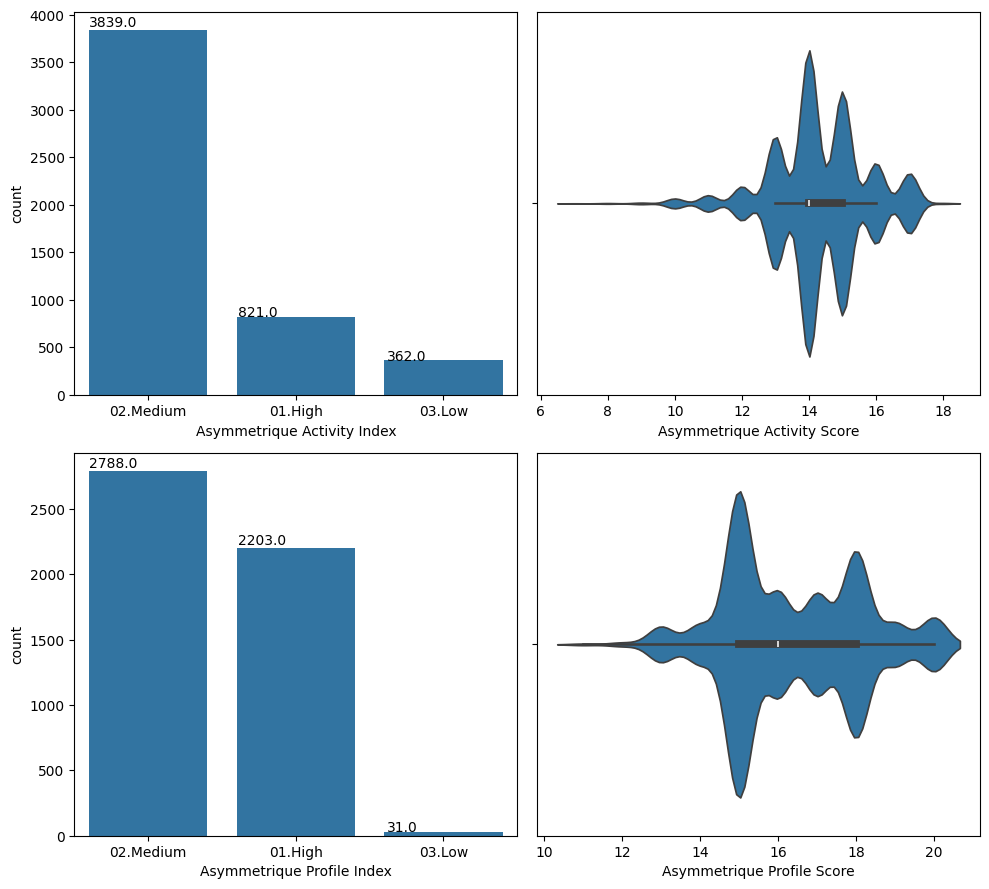

In [ ]:
fig, axs = plt.subplots(2,2, figsize = (10,9))
plt1 = sns.countplot(x=lead['Asymmetrique Activity Index'], ax = axs[0,0])
for p in plt1.patches:
    plt1.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt2 = sns.violinplot(x=lead['Asymmetrique Activity Score'], ax = axs[0,1])
plt3 = sns.countplot(x=lead['Asymmetrique Profile Index'], ax = axs[1,0])
for p in plt3.patches:
    plt3.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt4 = sns.violinplot(x=lead['Asymmetrique Profile Score'], ax = axs[1,1])
plt.tight_layout()

In [ ]:
lead = lead.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score',
                  'Asymmetrique Profile Index','Asymmetrique Profile Score'],axis=1)

In [ ]:
round(100*(lead.isnull().sum()/len(lead.index)), 2)

,0
Lead Origin,0.00
Lead Source,0.39
Do Not Email,0.00
Do Not Call,0.00
Converted,0.00
TotalVisits,1.48
Total Time Spent on Website,0.00
Page Views Per Visit,1.48
Last Activity,1.11
Country,26.63


City

In [ ]:
lead.City.value_counts()

,count
City,
Mumbai,3222
Thane & Outskirts,752
Other Cities,686
Other Cities of Maharashtra,457
Other Metro Cities,380
Tier II Cities,74


In [ ]:
lead.City.describe()

,City
count,5571
unique,6
top,Mumbai
freq,3222


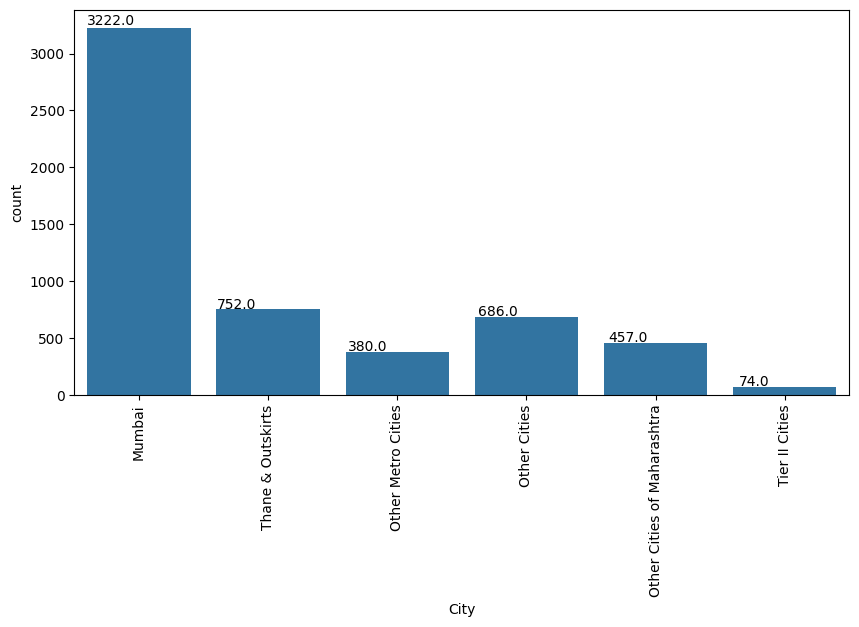

In [ ]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x=lead['City'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
plt.show()

In [ ]:
lead['City'] = lead['City'].replace(np.nan, 'Mumbai')

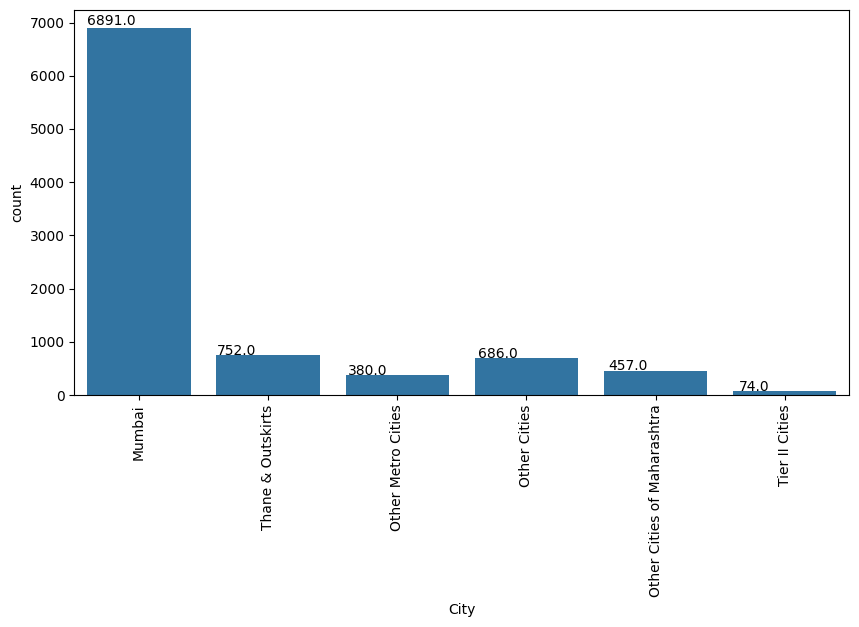

In [ ]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x=lead['City'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
plt.show()

Specialization

In [ ]:
lead.Specialization.describe()

,Specialization
count,5860
unique,18
top,Finance Management
freq,976


In [ ]:
lead.Specialization.value_counts()

,count
Specialization,
Finance Management,976
Human Resource Management,848
Marketing Management,838
Operations Management,503
Business Administration,403
IT Projects Management,366
Supply Chain Management,349
"Banking, Investment And Insurance",338
Media and Advertising,203


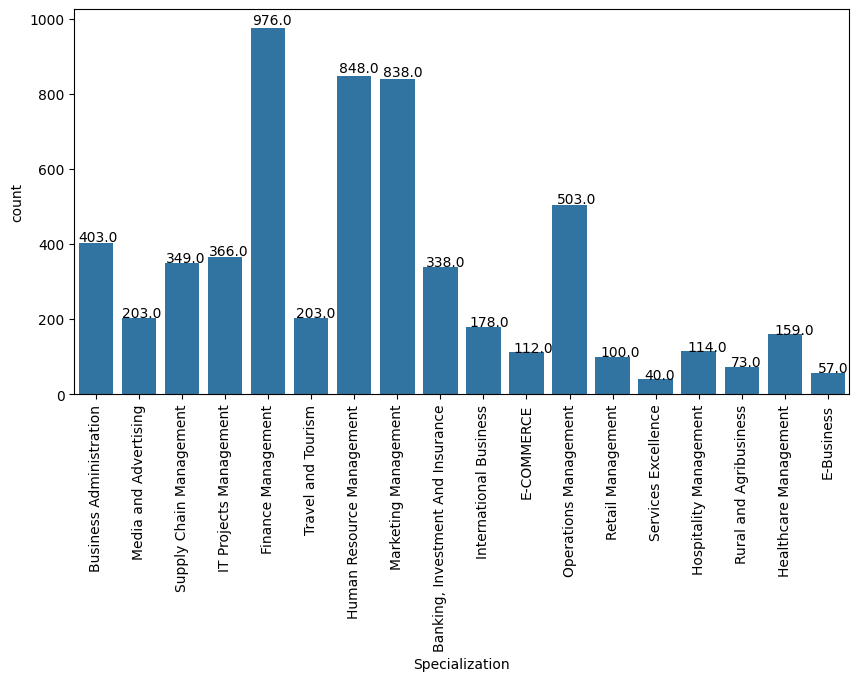

In [ ]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x=lead['Specialization'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
plt.show()

In [ ]:
lead['Specialization'] = lead['Specialization'].replace(np.nan, 'Others')

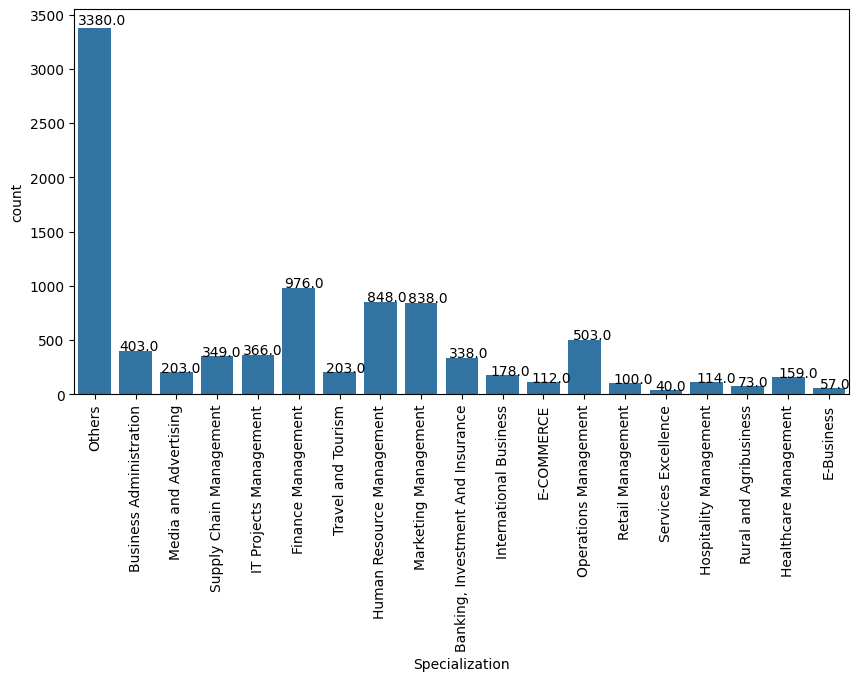

In [ ]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x=lead['Specialization'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
plt.show()

In [ ]:
round(100*(lead.isnull().sum()/len(lead.index)), 2)

,0
Lead Origin,0.00
Lead Source,0.39
Do Not Email,0.00
Do Not Call,0.00
Converted,0.00
TotalVisits,1.48
Total Time Spent on Website,0.00
Page Views Per Visit,1.48
Last Activity,1.11
Country,26.63


Tags

In [ ]:
lead.Tags.describe()

,Tags
count,5887
unique,26
top,Will revert after reading the email
freq,2072


In [ ]:
lead.Tags.value_counts()

,count
Tags,
Will revert after reading the email,2072
Ringing,1203
Interested in other courses,513
Already a student,465
Closed by Horizzon,358
switched off,240
Busy,186
Lost to EINS,175
Not doing further education,145


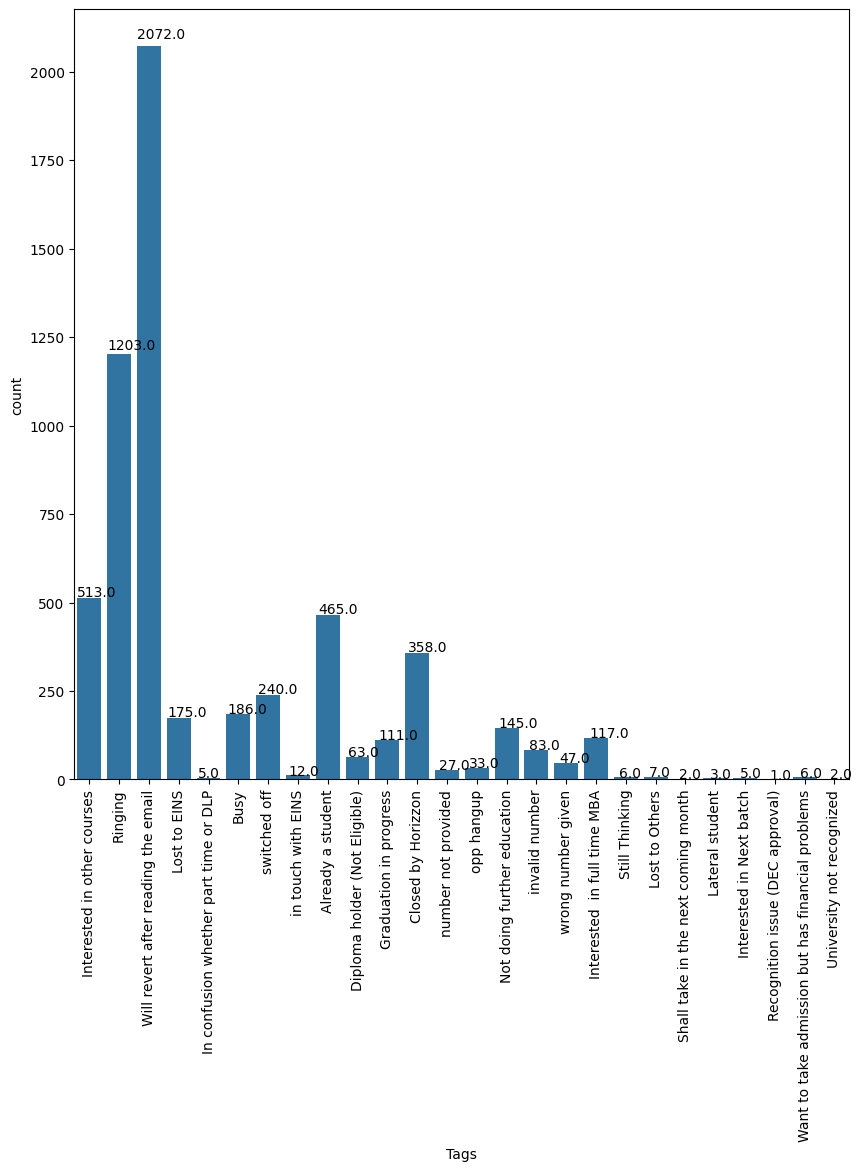

In [ ]:
plt.figure(figsize = (10,10))
ax= sns.countplot(x=lead['Tags'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
plt.show()

In [ ]:
lead['Tags'] = lead['Tags'].replace(np.nan, 'Will revert after reading the email')

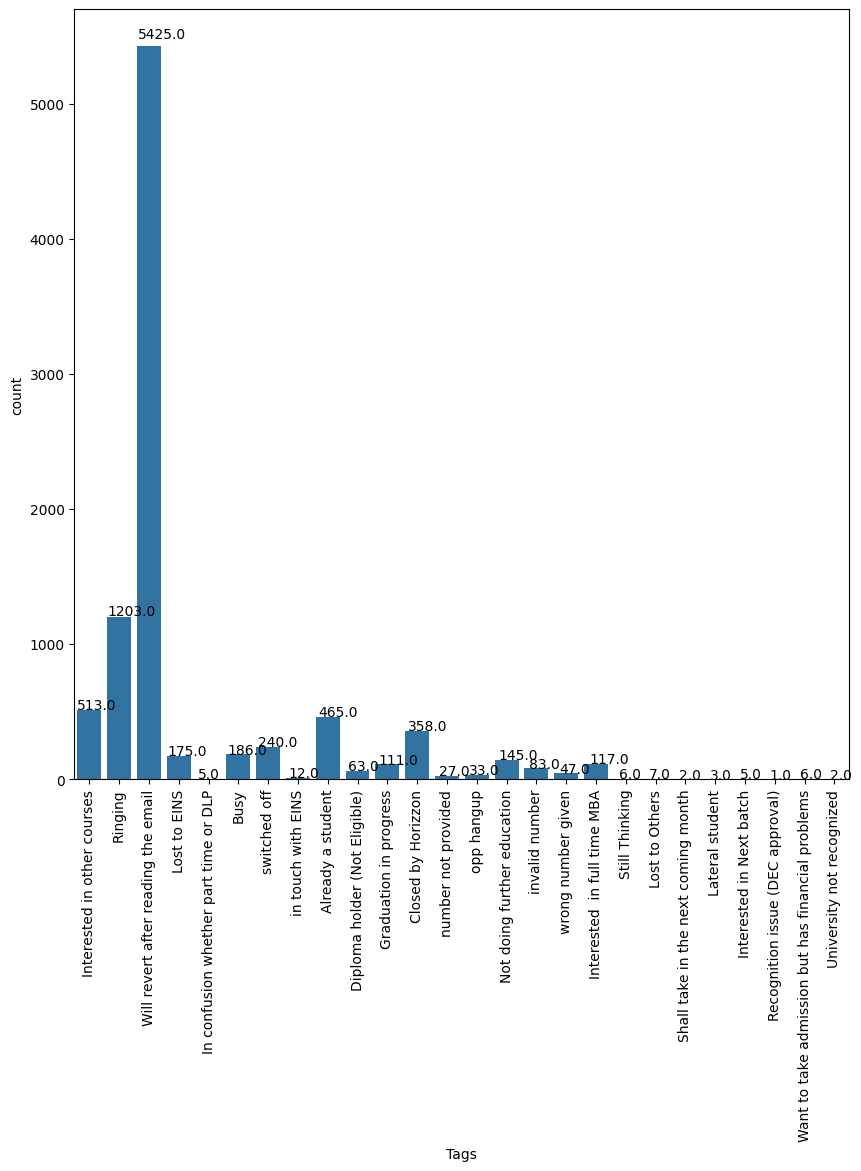

In [ ]:
plt.figure(figsize = (10,10))
ax= sns.countplot(x=lead['Tags'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
plt.show()

In [ ]:
lead['What matters most to you in choosing a course'].describe()

,What matters most to you in choosing a course
count,6531
unique,3
top,Better Career Prospects
freq,6528


In [ ]:
lead['What matters most to you in choosing a course'].value_counts()

,count
What matters most to you in choosing a course,
Better Career Prospects,6528
Flexibility & Convenience,2
Other,1


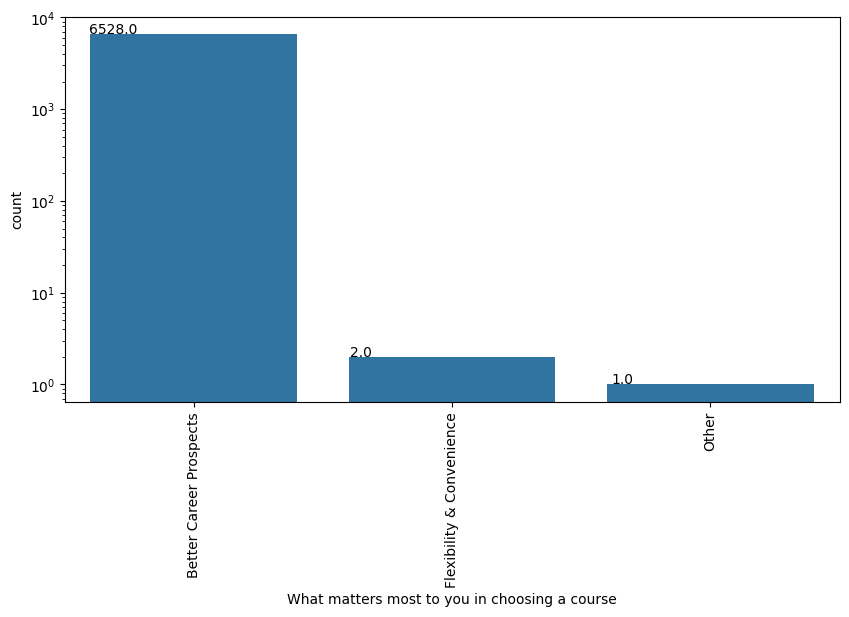

In [ ]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x=lead['What matters most to you in choosing a course'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

In [ ]:
lead['What matters most to you in choosing a course'] = lead['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

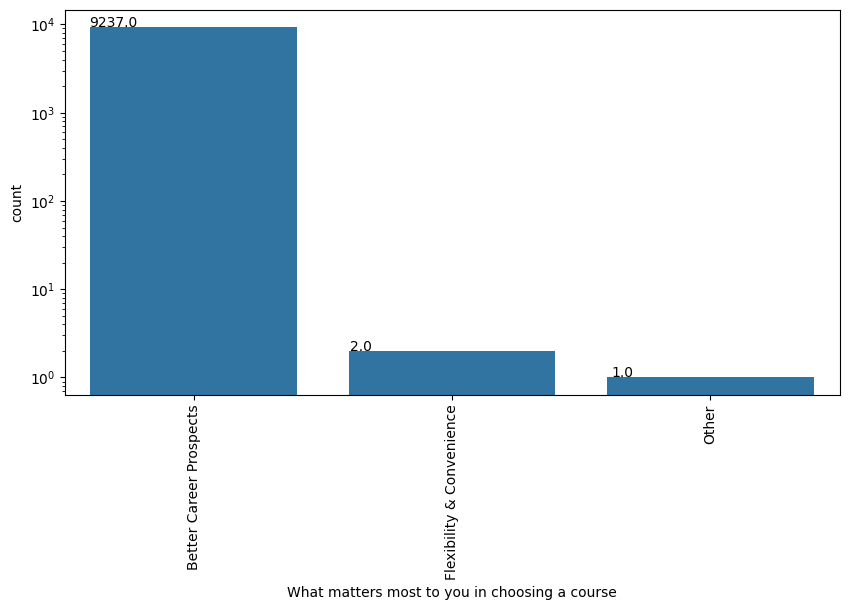

In [ ]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x=lead['What matters most to you in choosing a course'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

Occupation

In [ ]:
lead['What is your current occupation'].describe()

,What is your current occupation
count,6550
unique,6
top,Unemployed
freq,5600


In [ ]:
lead['What is your current occupation'].value_counts()

,count
What is your current occupation,
Unemployed,5600
Working Professional,706
Student,210
Other,16
Housewife,10
Businessman,8


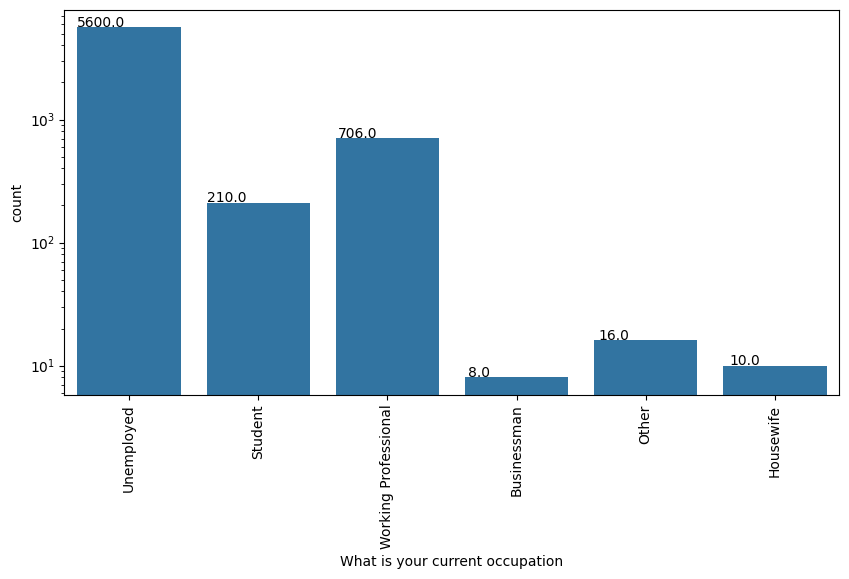

In [ ]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x=lead['What is your current occupation'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

In [ ]:
lead['What is your current occupation'] = lead['What is your current occupation'].replace(np.nan, 'Unemployed')

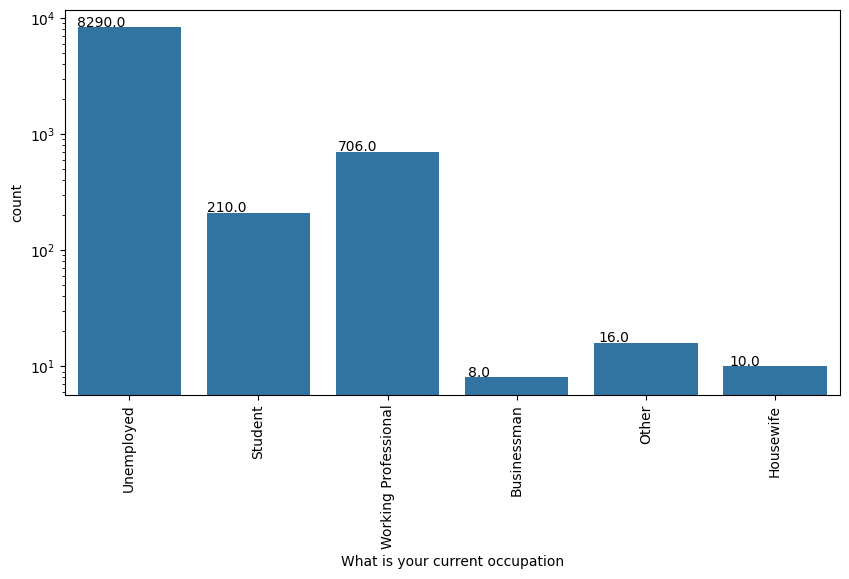

In [ ]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x=lead['What is your current occupation'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

Country

In [ ]:
lead['Country'].describe()

,Country
count,6779
unique,38
top,India
freq,6492


In [ ]:
lead['Country'].value_counts()

,count
Country,
India,6492
United States,69
United Arab Emirates,53
Singapore,24
Saudi Arabia,21
United Kingdom,15
Australia,13
Qatar,10
Hong Kong,7


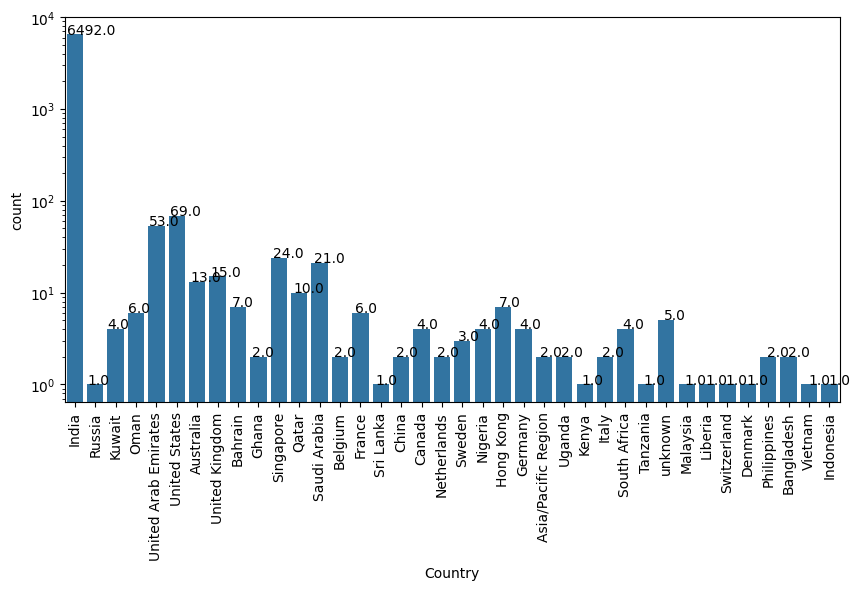

In [ ]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x=lead['Country'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

In [ ]:
lead['Country'] = lead['Country'].replace(np.nan, 'India')

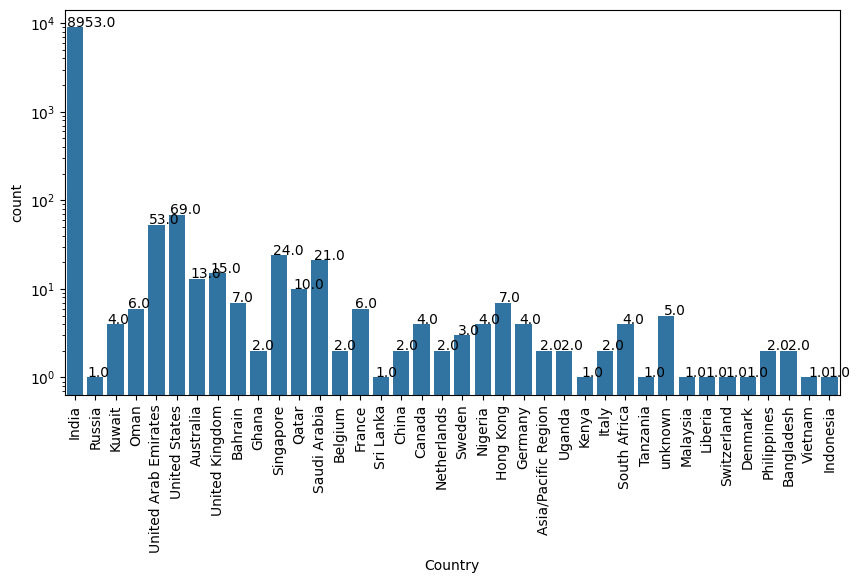

In [ ]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x=lead['Country'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

In [ ]:
round(100*(lead.isnull().sum()/len(lead.index)), 2)

,0
Lead Origin,0.00
Lead Source,0.39
Do Not Email,0.00
Do Not Call,0.00
Converted,0.00
TotalVisits,1.48
Total Time Spent on Website,0.00
Page Views Per Visit,1.48
Last Activity,1.11
Country,0.00


In [ ]:
lead.isnull().sum()

,0
Lead Origin,0
Lead Source,36
Do Not Email,0
Do Not Call,0
Converted,0
TotalVisits,137
Total Time Spent on Website,0
Page Views Per Visit,137
Last Activity,103
Country,0


In [ ]:
lead.dropna(inplace = True)

In [ ]:
round(100*(lead.isnull().sum()/len(lead.index)), 2)

,0
Lead Origin,0.0
Lead Source,0.0
Do Not Email,0.0
Do Not Call,0.0
Converted,0.0
TotalVisits,0.0
Total Time Spent on Website,0.0
Page Views Per Visit,0.0
Last Activity,0.0
Country,0.0


In [ ]:
lead.isnull().sum()

,0
Lead Origin,0
Lead Source,0
Do Not Email,0
Do Not Call,0
Converted,0
TotalVisits,0
Total Time Spent on Website,0
Page Views Per Visit,0
Last Activity,0
Country,0


In [ ]:
data_retailed= len(lead)* 100 / len(lead_dub)
print("{} % of original rows is available for EDA".format(round(data_retailed,2)))

98.2 % of original rows is available for EDA


In [ ]:
lead.shape

(9074, 29)

Exploratory Data Analysis

Unvariate Analysis

Converted

In [ ]:
Converted = round((sum(lead['Converted'])/len(lead['Converted'].index))*100,2)

print("We have almost {} %  Converted rate".format(Converted))

We have almost 37.86 %  Converted rate


Lead Origin

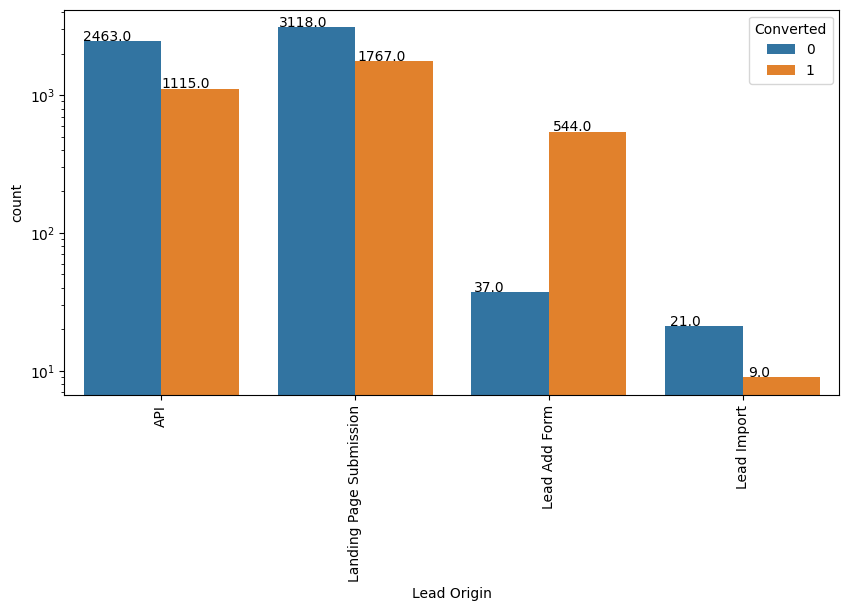

In [ ]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x = "Lead Origin", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

Lead Source

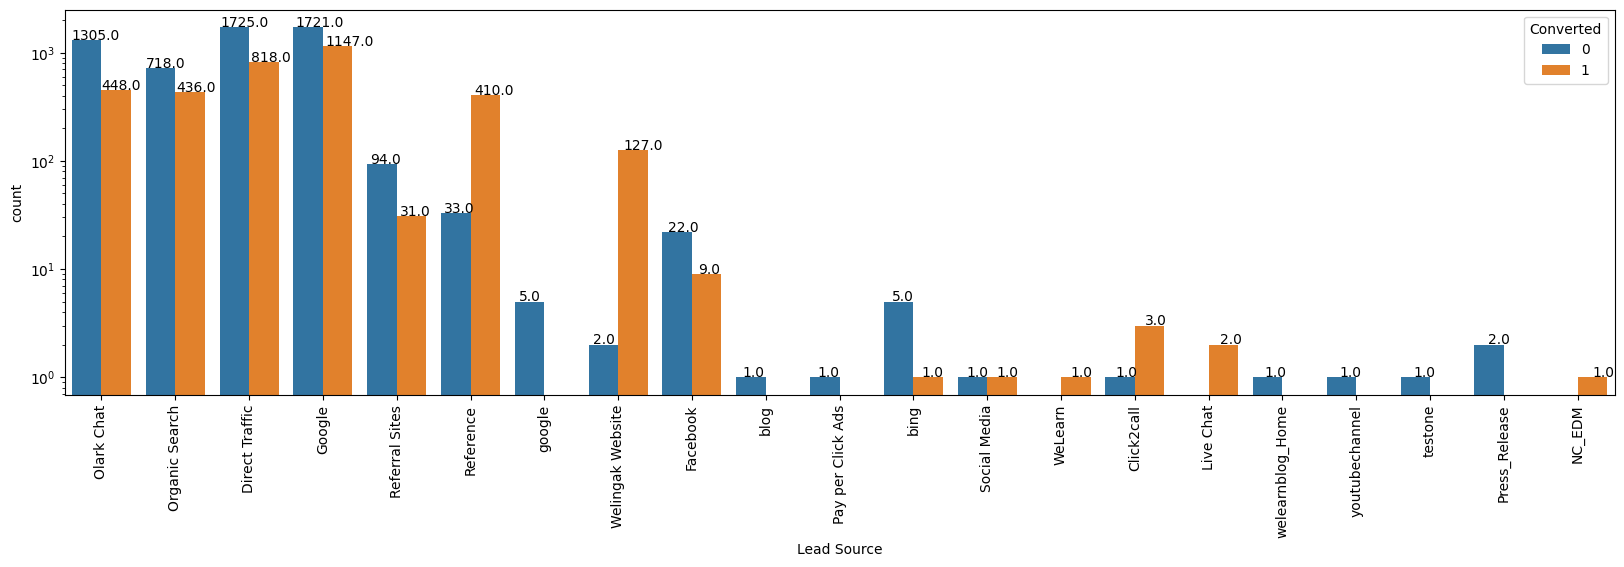

In [ ]:
plt.figure(figsize = (20,5))
ax= sns.countplot(x = "Lead Source", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

In [ ]:
lead['Lead Source'] = lead['Lead Source'].replace(['google'], 'Google')
lead['Lead Source'] = lead['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

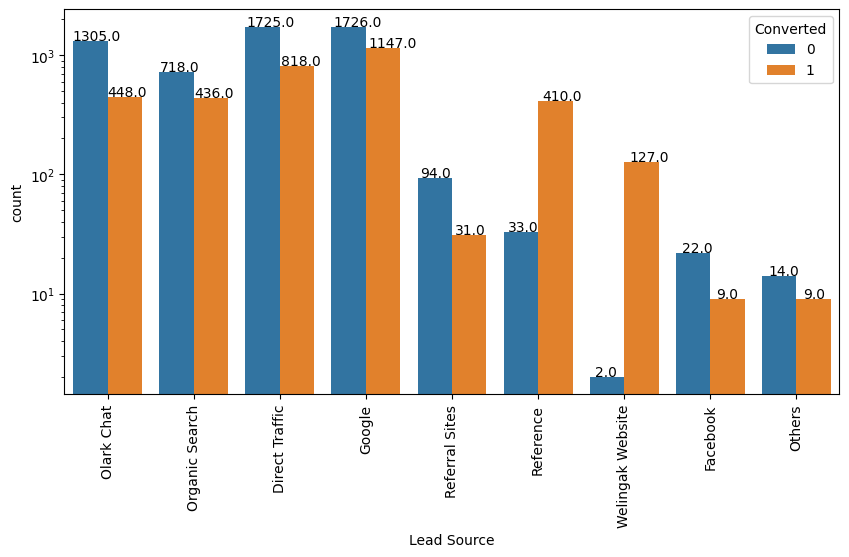

In [ ]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x = "Lead Source", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

Do Not Email & Do Not Call

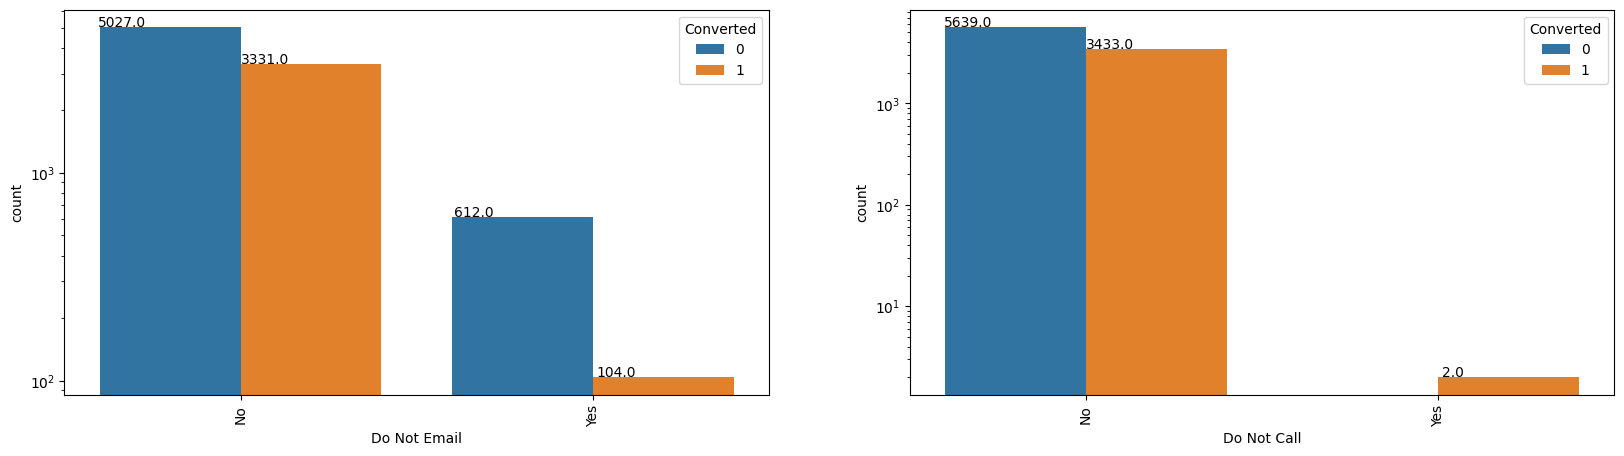

In [ ]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
ax= sns.countplot(x = "Do Not Email", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.subplot(1,2,2)
ax= sns.countplot(x = "Do Not Call", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

Total Visits

In [ ]:
lead['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

,TotalVisits
count,9074.000000
mean,3.456028
std,4.858802
min,0.000000
5%,0.000000
25%,1.000000
50%,3.000000
75%,5.000000
90%,7.000000
95%,10.000000


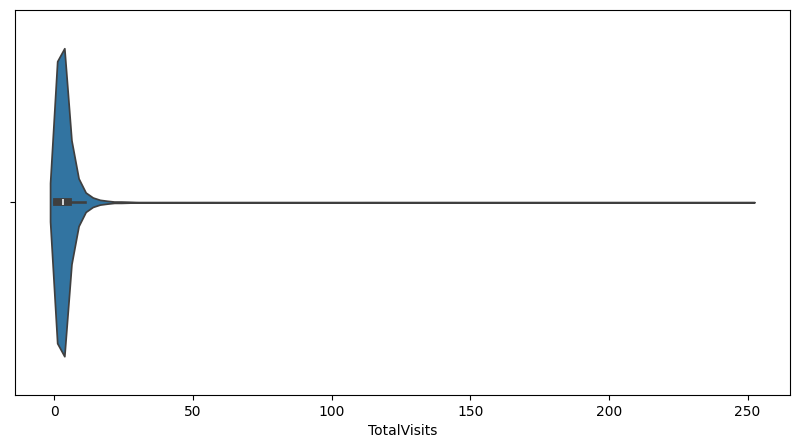

In [ ]:
plt.figure(figsize = (10,5))
sns.violinplot(x=lead['TotalVisits'])
plt.show()

In [ ]:
percentiles = lead['TotalVisits'].quantile([0.05,0.95]).values
lead['TotalVisits'][lead['TotalVisits'] <= percentiles[0]] = percentiles[0]
lead['TotalVisits'][lead['TotalVisits'] >= percentiles[1]] = percentiles[1]

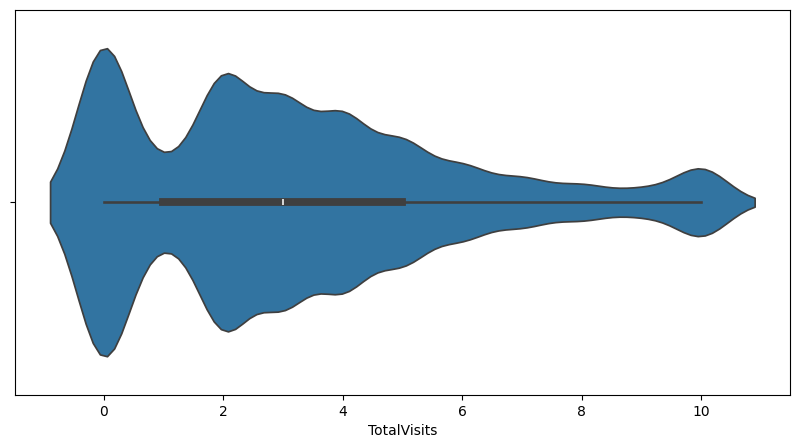

In [ ]:
plt.figure(figsize = (10,5))
sns.violinplot(x=lead['TotalVisits'])
plt.show()

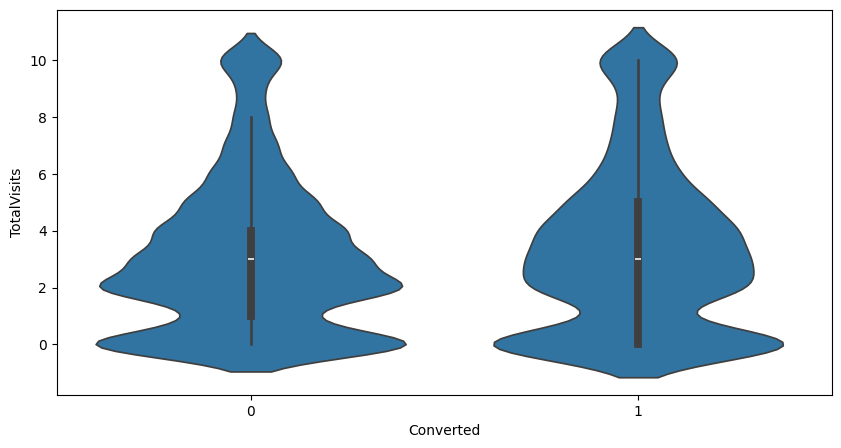

In [ ]:
plt.figure(figsize = (10,5))
sns.violinplot(y = 'TotalVisits', x = 'Converted', data = lead)
plt.show()

Total time spent on website

In [ ]:
lead['Total Time Spent on Website'].describe()


,Total Time Spent on Website
count,9074.000000
mean,482.887481
std,545.256560
min,0.000000
25%,11.000000
50%,246.000000
75%,922.750000
max,2272.000000


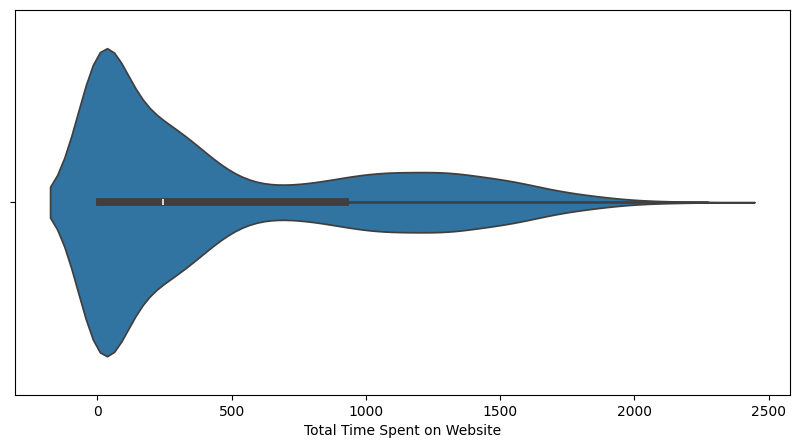

In [ ]:
plt.figure(figsize = (10,5))
sns.violinplot(x=lead['Total Time Spent on Website'])
plt.show()

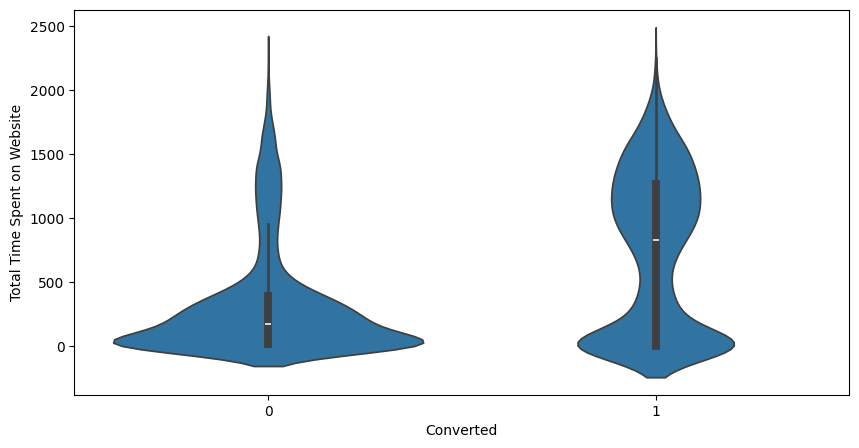

In [ ]:
plt.figure(figsize = (10,5))
sns.violinplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead)
plt.show()

Page views per visit

In [ ]:
lead['Page Views Per Visit'].describe()

,Page Views Per Visit
count,9074.000000
mean,2.370151
std,2.160871
min,0.000000
25%,1.000000
50%,2.000000
75%,3.200000
max,55.000000


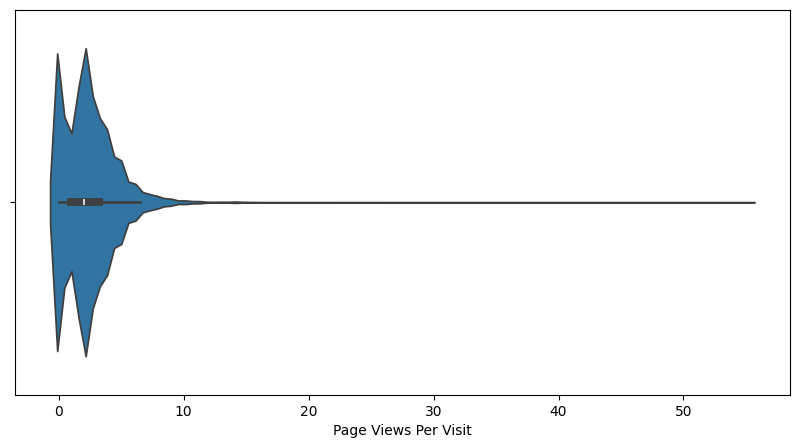

In [ ]:
plt.figure(figsize = (10,5))
sns.violinplot(x=lead['Page Views Per Visit'])
plt.show()

In [ ]:
percentiles = lead['Page Views Per Visit'].quantile([0.05,0.95]).values
lead['Page Views Per Visit'][lead['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
lead['Page Views Per Visit'][lead['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]


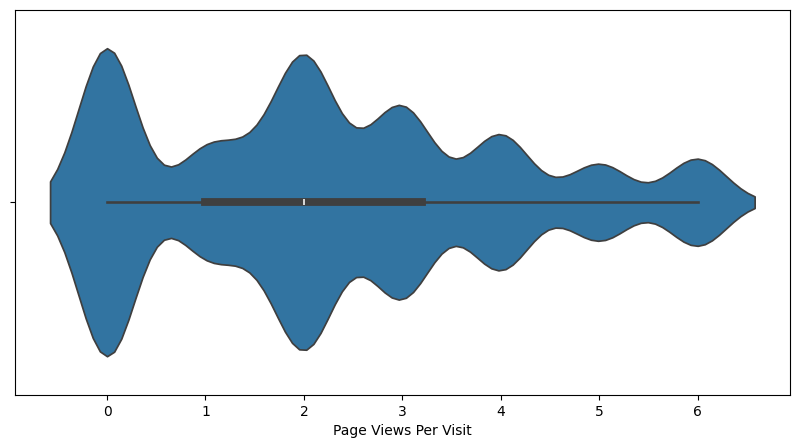

In [ ]:
plt.figure(figsize = (10,5))
sns.violinplot(x=lead['Page Views Per Visit'])
plt.show()

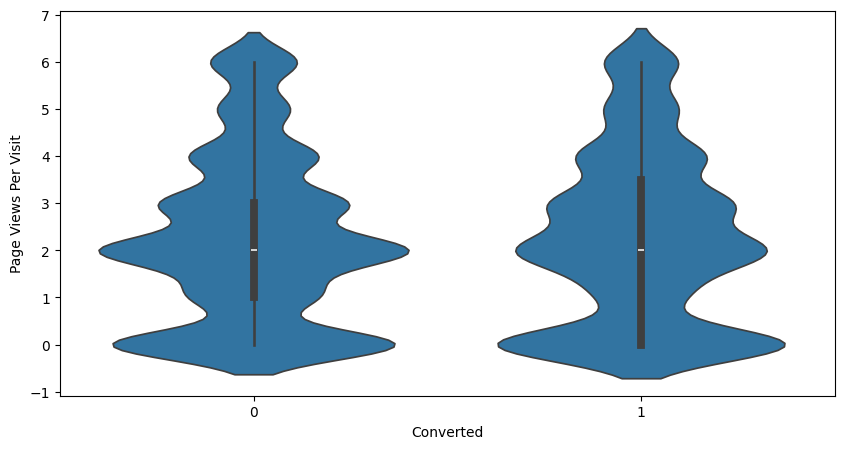

In [ ]:
plt.figure(figsize = (10,5))
sns.violinplot(y = 'Page Views Per Visit', x = 'Converted', data = lead)
plt.show()

Last Activity

In [ ]:
lead['Last Activity'].describe()

,Last Activity
count,9074
unique,17
top,Email Opened
freq,3432


In [ ]:
lead['Last Activity'].value_counts()

,count
Last Activity,
Email Opened,3432
SMS Sent,2716
Olark Chat Conversation,972
Page Visited on Website,640
Converted to Lead,428
Email Bounced,312
Email Link Clicked,267
Form Submitted on Website,116
Unreachable,90


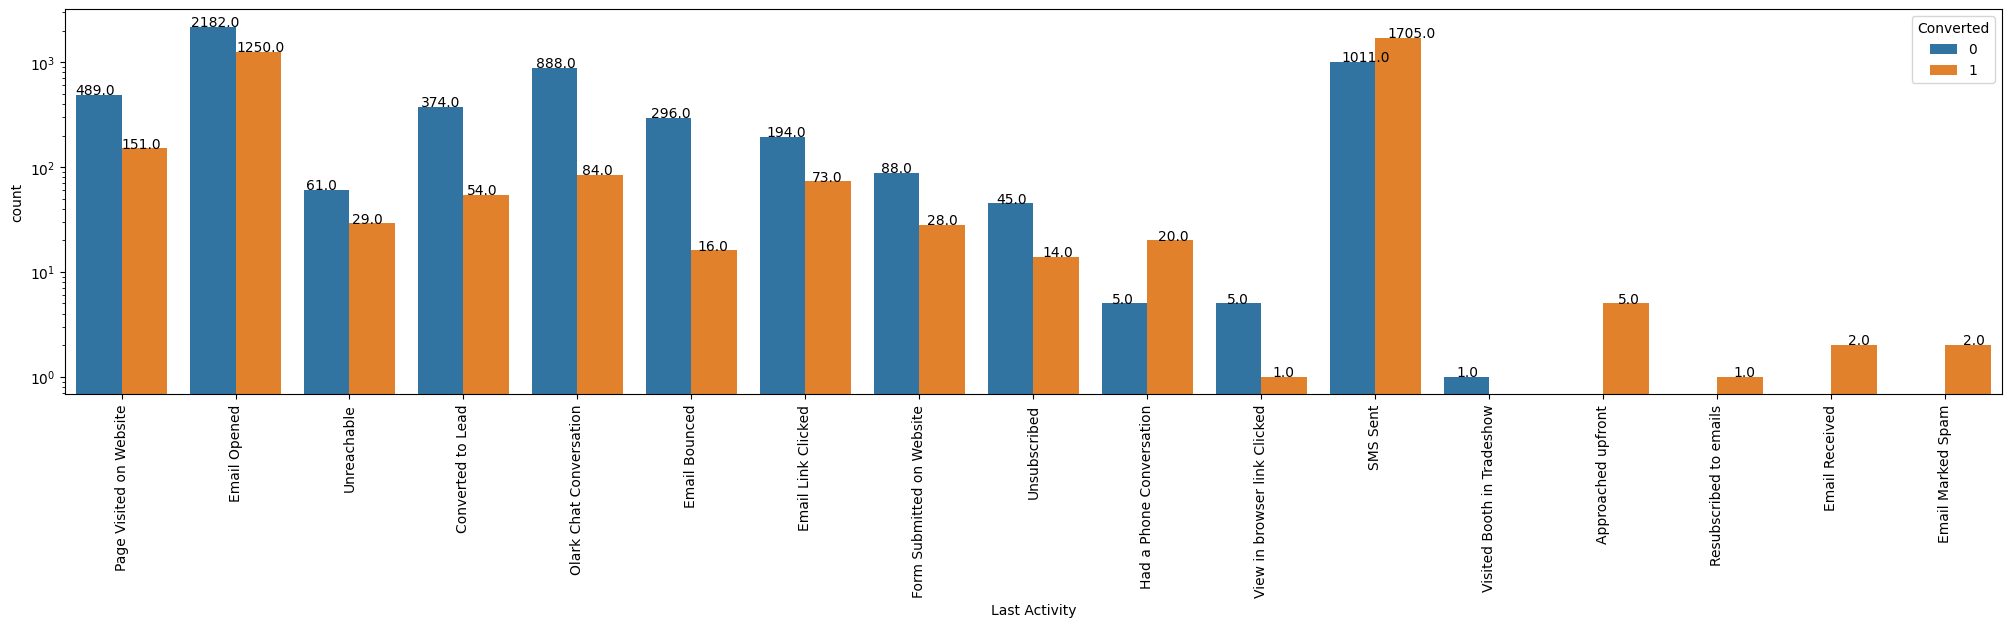

In [ ]:
plt.figure(figsize = (25,5))
ax= sns.countplot(x = "Last Activity", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

In [ ]:
lead['Last Activity'] = lead['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked',
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'],
                                                      'Other_Activity')

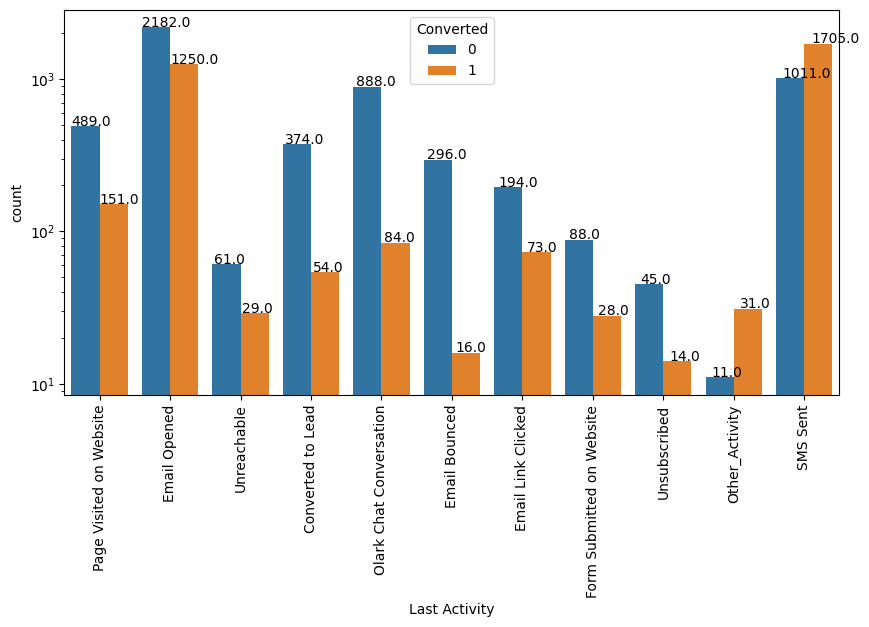

In [ ]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x = "Last Activity", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

Country

In [ ]:
lead.Country.describe()

,Country
count,9074
unique,38
top,India
freq,8787


In [ ]:
lead.Country.value_counts()

,count
Country,
India,8787
United States,69
United Arab Emirates,53
Singapore,24
Saudi Arabia,21
United Kingdom,15
Australia,13
Qatar,10
Hong Kong,7


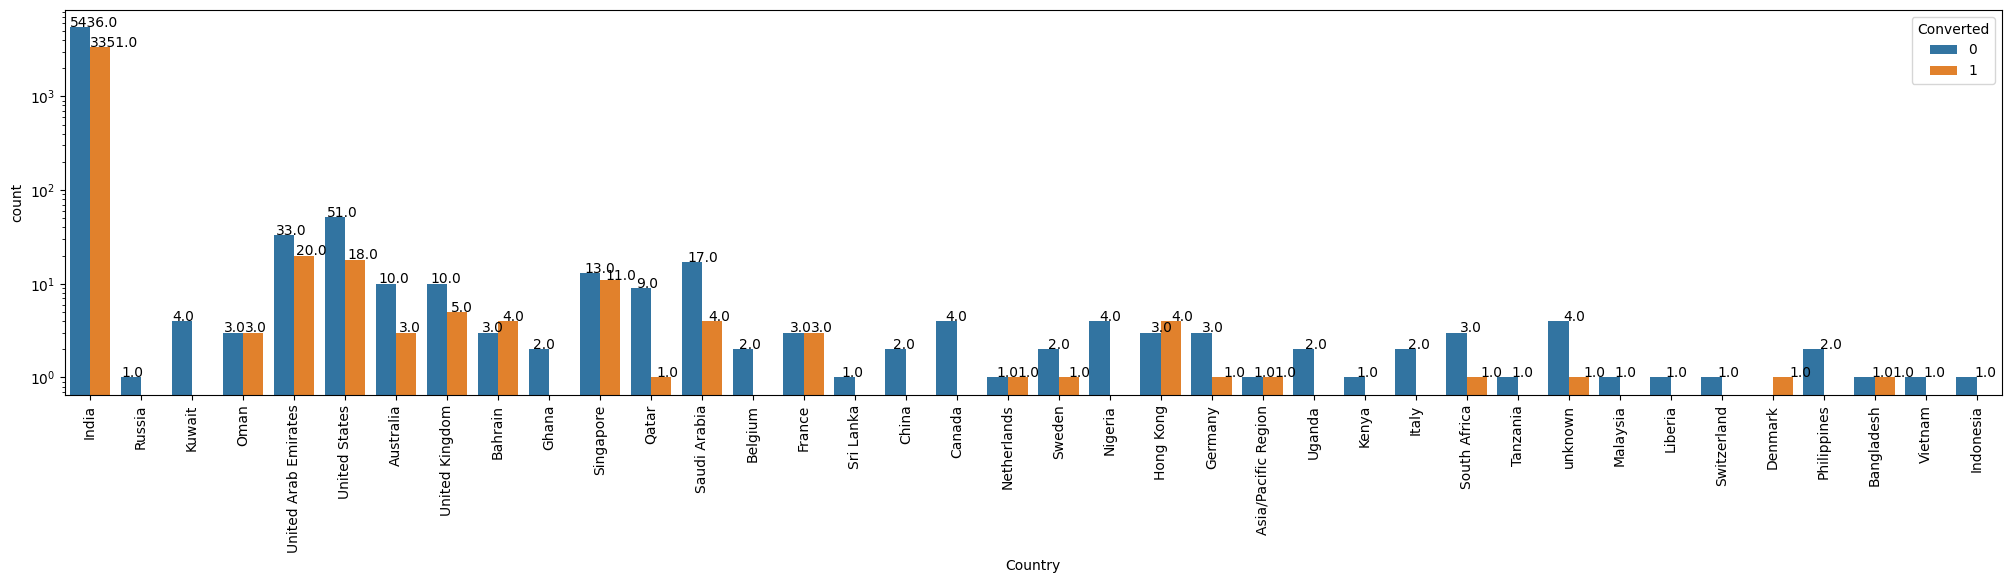

In [ ]:
plt.figure(figsize = (25,5))
ax= sns.countplot(x = "Country", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

Specialization

In [ ]:
lead.Specialization.describe()

,Specialization
count,9074
unique,19
top,Others
freq,3282


In [ ]:
lead.Specialization.value_counts()

,count
Specialization,
Others,3282
Finance Management,959
Human Resource Management,837
Marketing Management,823
Operations Management,499
Business Administration,399
IT Projects Management,366
Supply Chain Management,346
"Banking, Investment And Insurance",335


In [ ]:
lead['Specialization'] = lead['Specialization'].replace(['Others'], 'Other_Specialization')

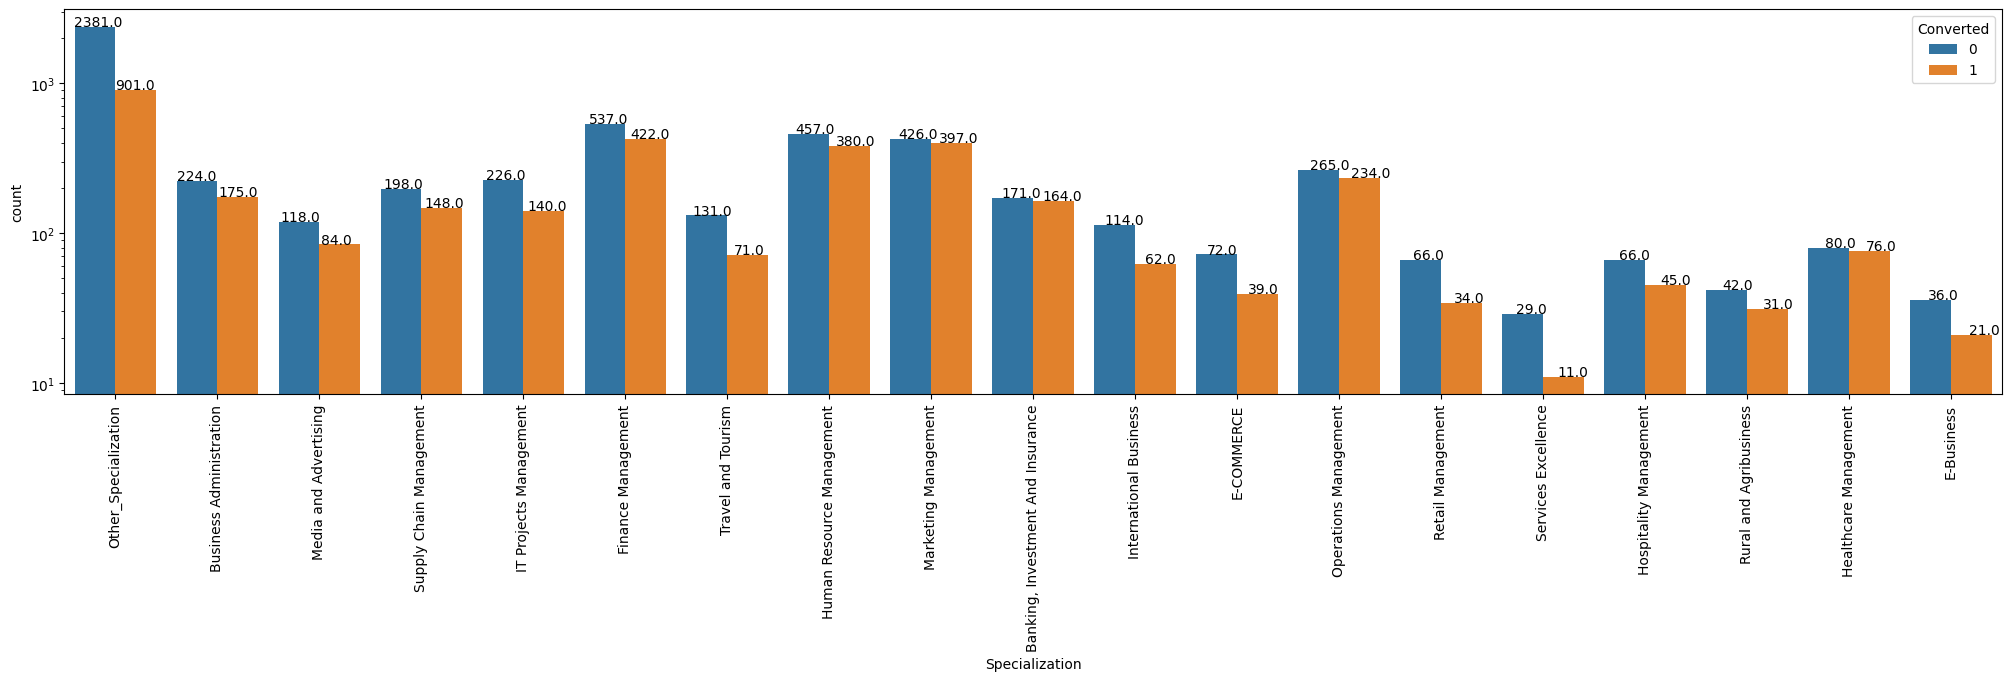

In [ ]:
plt.figure(figsize = (25,5))
ax= sns.countplot(x = "Specialization", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

Occupation

In [ ]:
lead['What is your current occupation'].describe()

,What is your current occupation
count,9074
unique,6
top,Unemployed
freq,8159


In [ ]:
lead['What is your current occupation'].value_counts()

,count
What is your current occupation,
Unemployed,8159
Working Professional,677
Student,206
Other,15
Housewife,9
Businessman,8


In [ ]:
lead['What is your current occupation'] = lead['What is your current occupation'].replace(['Other'], 'Other_Occupation')

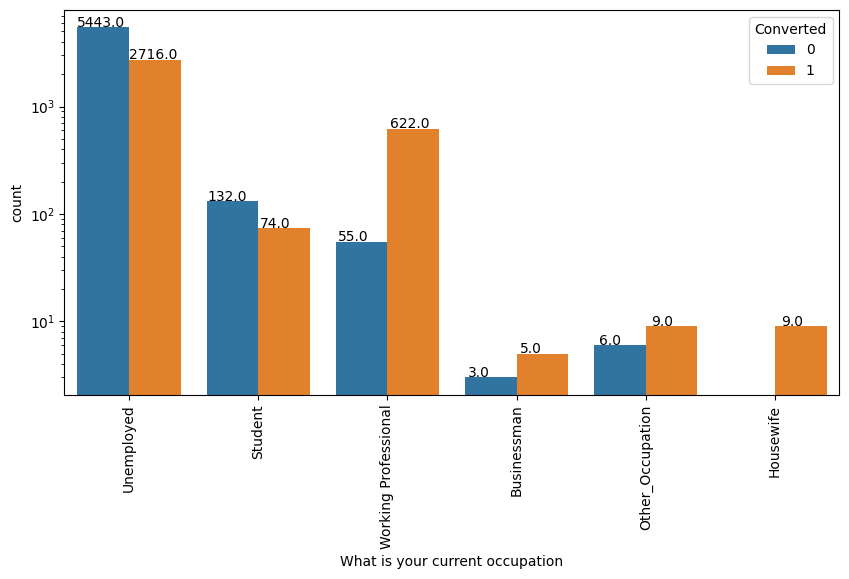

In [ ]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x = "What is your current occupation", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

What matters most to you in choosing a course

In [ ]:
lead['What matters most to you in choosing a course'].describe()

,What matters most to you in choosing a course
count,9074
unique,3
top,Better Career Prospects
freq,9072


In [ ]:
lead['What matters most to you in choosing a course'].value_counts()

,count
What matters most to you in choosing a course,
Better Career Prospects,9072
Flexibility & Convenience,1
Other,1


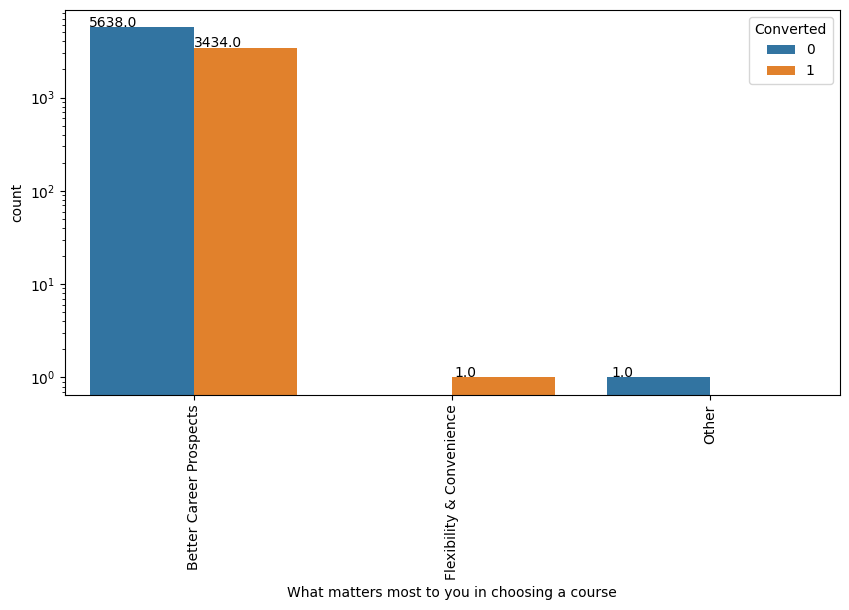

In [ ]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x = "What matters most to you in choosing a course", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

Search

In [ ]:
lead.Search.describe()

,Search
count,9074
unique,2
top,No
freq,9060


In [ ]:
lead.Search.value_counts()

,count
Search,
No,9060
Yes,14


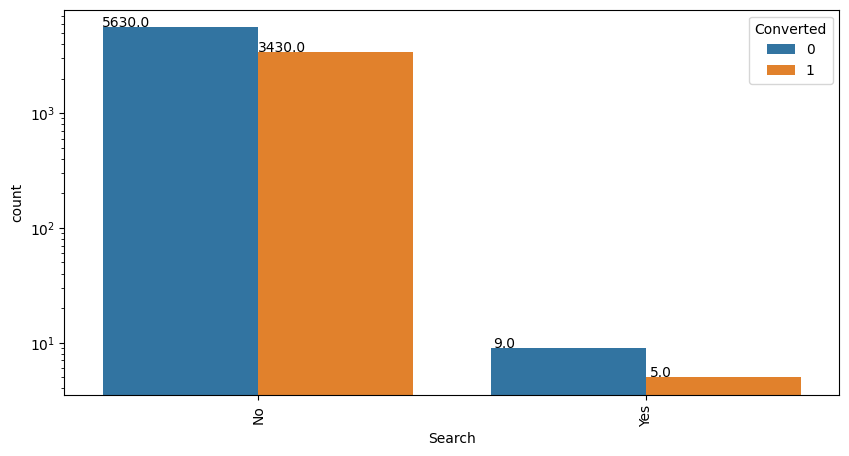

In [ ]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x = "Search", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

Magazine

In [ ]:
lead.Magazine.describe()

,Magazine
count,9074
unique,1
top,No
freq,9074


In [ ]:
lead.Magazine.value_counts()

,count
Magazine,
No,9074


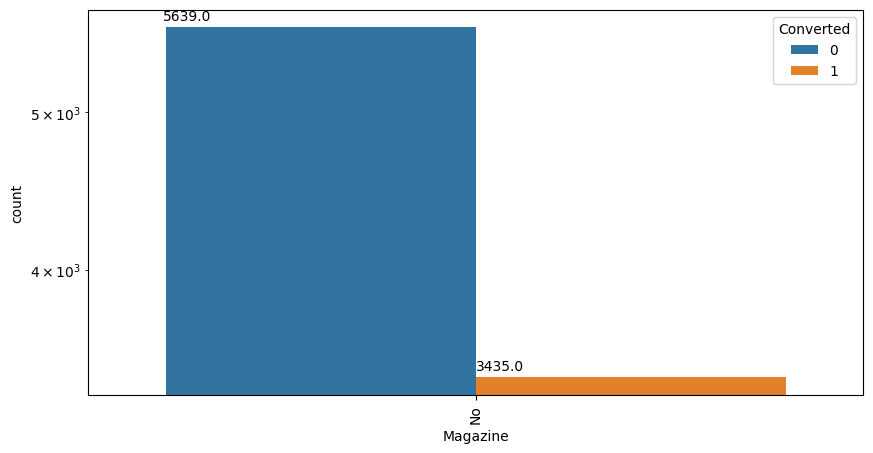

In [ ]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x = "Magazine", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

Newspaper Article

In [ ]:
lead['Newspaper Article'].describe()

,Newspaper Article
count,9074
unique,2
top,No
freq,9072


In [ ]:
lead['Newspaper Article'].value_counts()

,count
Newspaper Article,
No,9072
Yes,2


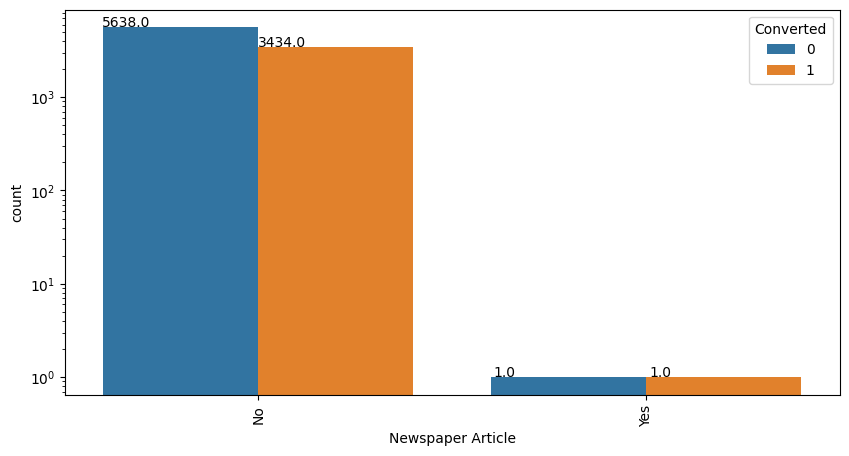

In [ ]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x = "Newspaper Article", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

X Education Forms

In [ ]:
lead['X Education Forums'].describe()

,X Education Forums
count,9074
unique,2
top,No
freq,9073


In [ ]:
lead['X Education Forums'].value_counts()

,count
X Education Forums,
No,9073
Yes,1


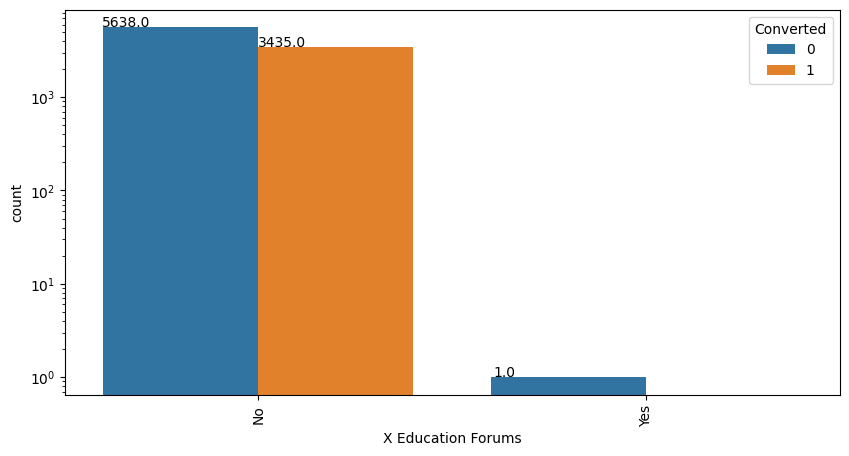

In [ ]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x = "X Education Forums", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

Newspaper

In [ ]:
lead['Newspaper'].describe()

,Newspaper
count,9074
unique,2
top,No
freq,9073


In [ ]:
lead['Newspaper'].value_counts()

,count
Newspaper,
No,9073
Yes,1


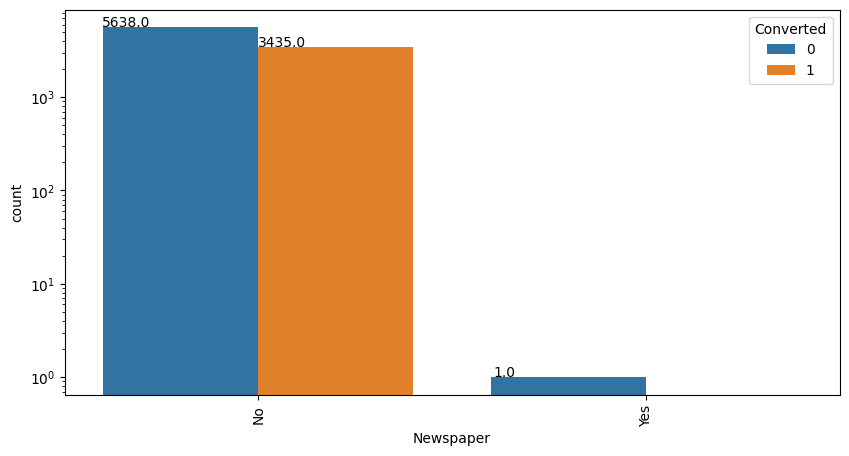

In [ ]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x = "Newspaper", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

Digital Advertisement

In [ ]:
lead['Digital Advertisement'].describe()

,Digital Advertisement
count,9074
unique,2
top,No
freq,9070


In [ ]:
lead['Digital Advertisement'].value_counts()

,count
Digital Advertisement,
No,9070
Yes,4


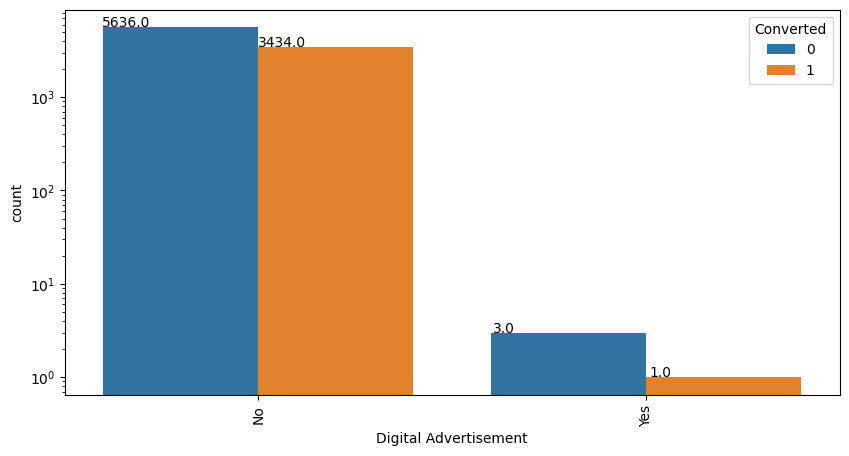

In [ ]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x = "Digital Advertisement", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

Through Recommendations

In [ ]:
lead['Through Recommendations'].describe()

,Through Recommendations
count,9074
unique,2
top,No
freq,9067


In [ ]:
lead['Through Recommendations'].value_counts()

,count
Through Recommendations,
No,9067
Yes,7


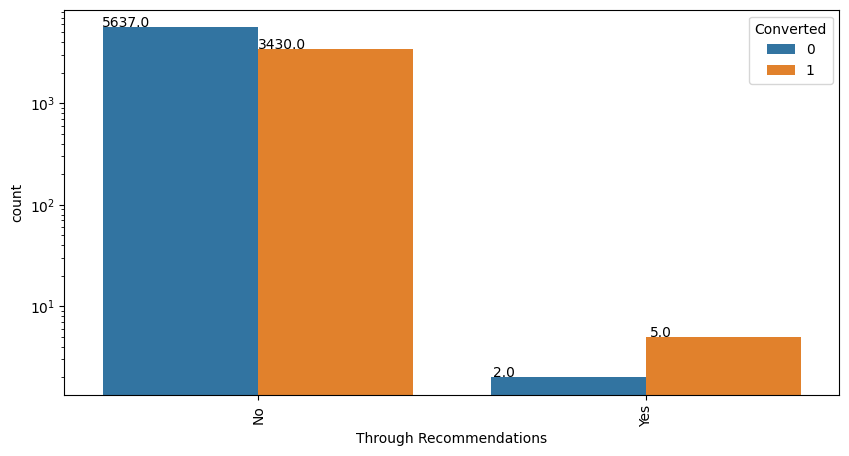

In [ ]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x = "Through Recommendations", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

Receive More Updates About Our Courses

In [ ]:
lead['Receive More Updates About Our Courses'].describe()

,Receive More Updates About Our Courses
count,9074
unique,1
top,No
freq,9074


In [ ]:
lead['Receive More Updates About Our Courses'].value_counts()

,count
Receive More Updates About Our Courses,
No,9074


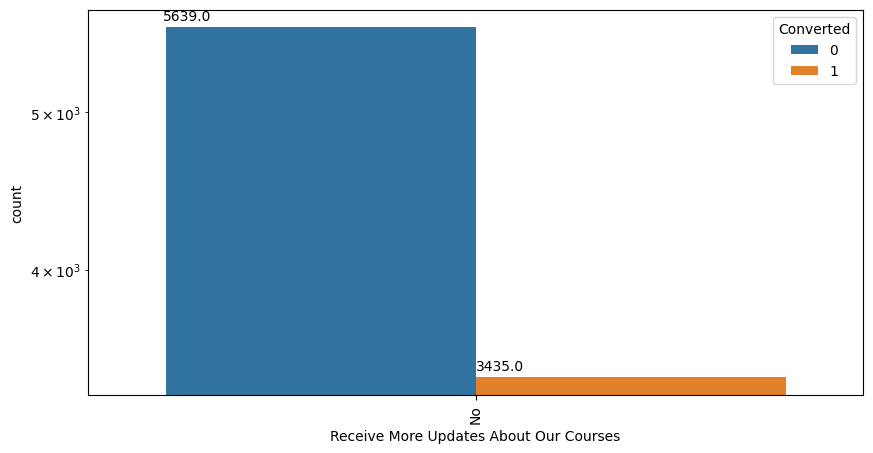

In [ ]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

Tags

In [ ]:
lead.Tags.describe()

,Tags
count,9074
unique,26
top,Will revert after reading the email
freq,5343


In [ ]:
lead.Tags.value_counts()

,count
Tags,
Will revert after reading the email,5343
Ringing,1187
Interested in other courses,509
Already a student,465
Closed by Horizzon,301
switched off,240
Busy,185
Lost to EINS,172
Not doing further education,145


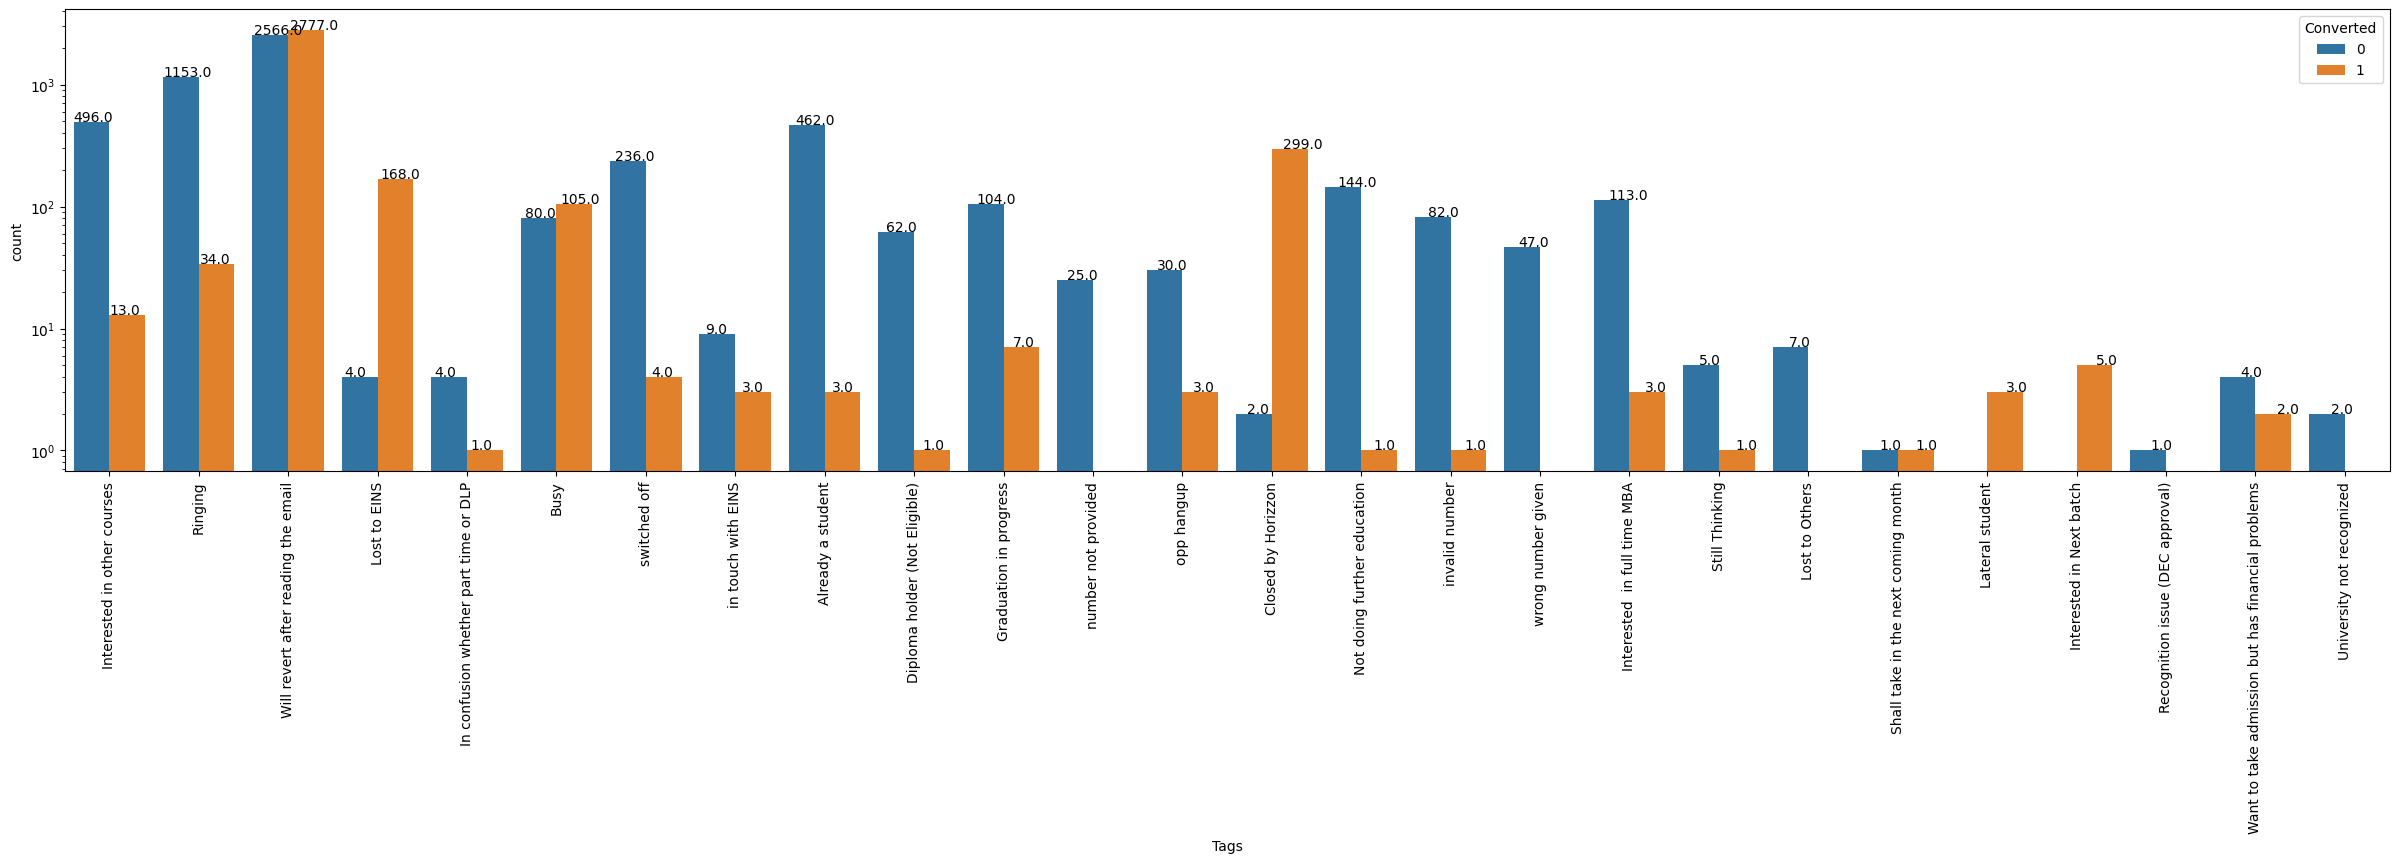

In [ ]:
plt.figure(figsize = (30,6))
ax= sns.countplot(x = "Tags", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

In [ ]:
lead['Tags'] = lead['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

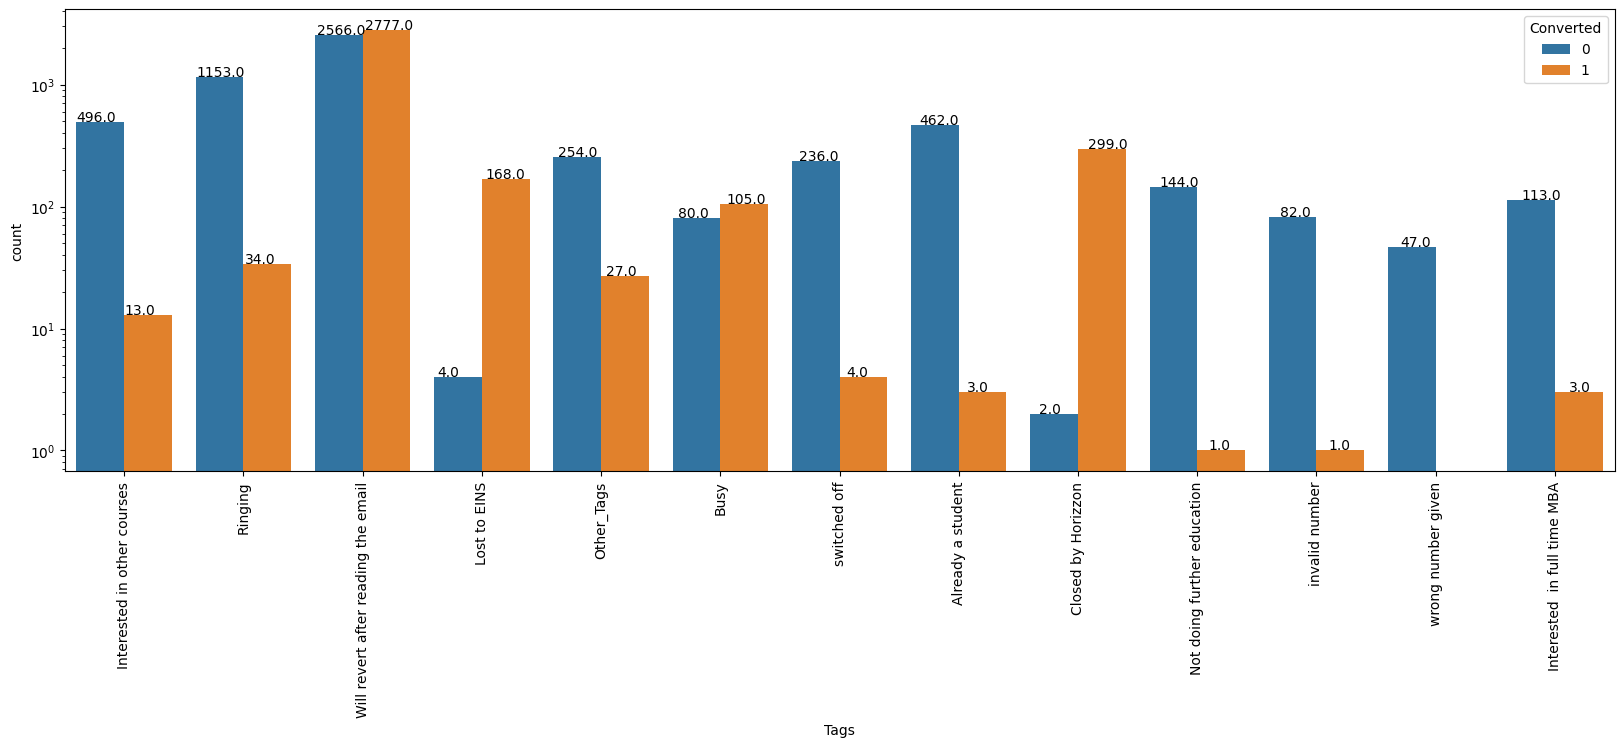

In [ ]:
plt.figure(figsize = (20,6))
ax= sns.countplot(x = "Tags", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

Lead Quality

In [ ]:
lead['Lead Quality'].describe()

,Lead Quality
count,9074
unique,5
top,Not Sure
freq,5806


In [ ]:
lead['Lead Quality'].value_counts()

,count
Lead Quality,
Not Sure,5806
Might be,1519
Worst,601
High in Relevance,592
Low in Relevance,556


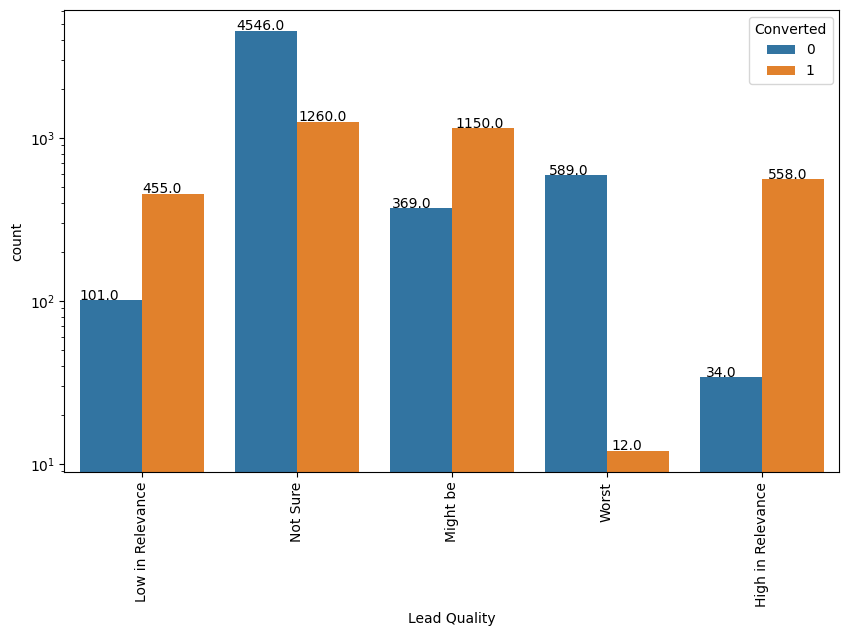

In [ ]:
plt.figure(figsize = (10,6))
ax= sns.countplot(x = "Lead Quality", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

Update me on Supply Chain Content

In [ ]:
lead['Update me on Supply Chain Content'].describe()

,Update me on Supply Chain Content
count,9074
unique,1
top,No
freq,9074


In [ ]:
lead['Update me on Supply Chain Content'].value_counts()

,count
Update me on Supply Chain Content,
No,9074


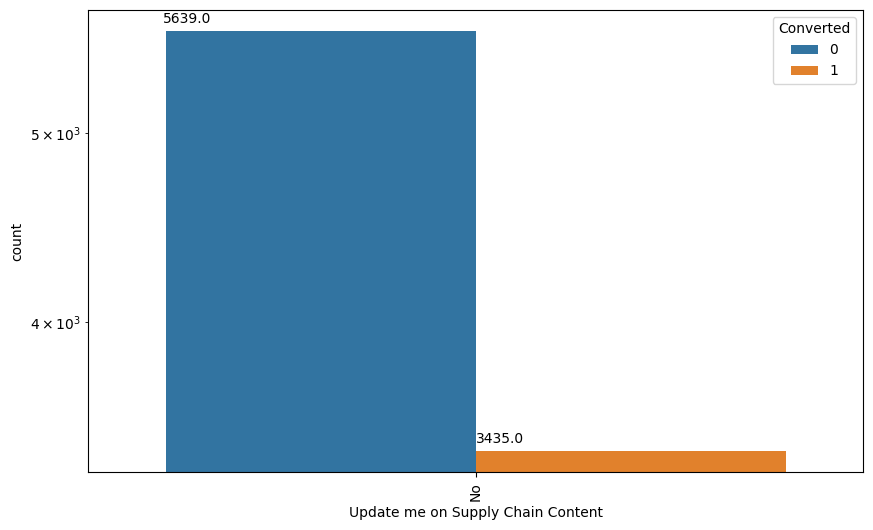

In [ ]:
plt.figure(figsize = (10,6))
ax= sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

Get updates on DM Content

In [ ]:
lead['Get updates on DM Content'].describe()


,Get updates on DM Content
count,9074
unique,1
top,No
freq,9074


In [ ]:
lead['Get updates on DM Content'].value_counts()

,count
Get updates on DM Content,
No,9074


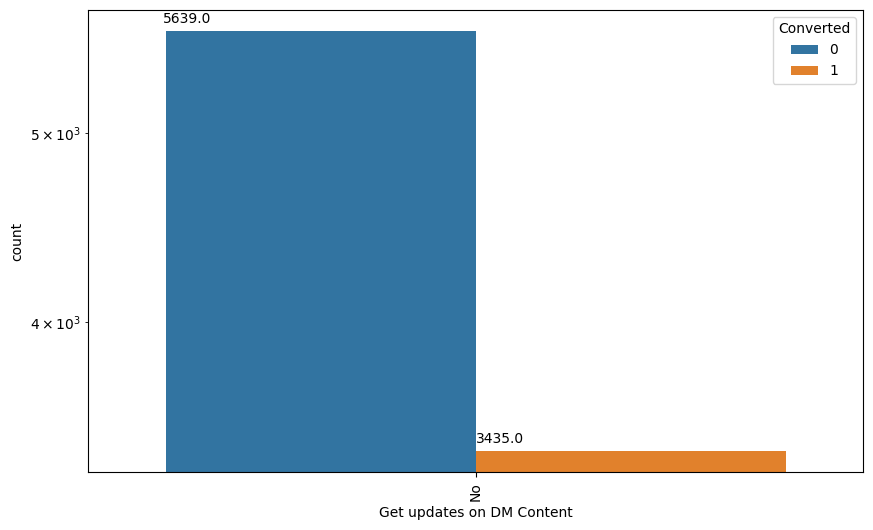

In [ ]:
plt.figure(figsize = (10,6))
ax= sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

I agree to pay the amount through cheque

In [ ]:
lead['I agree to pay the amount through cheque'].describe()

,I agree to pay the amount through cheque
count,9074
unique,1
top,No
freq,9074


In [ ]:
lead['I agree to pay the amount through cheque'].value_counts()

,count
I agree to pay the amount through cheque,
No,9074


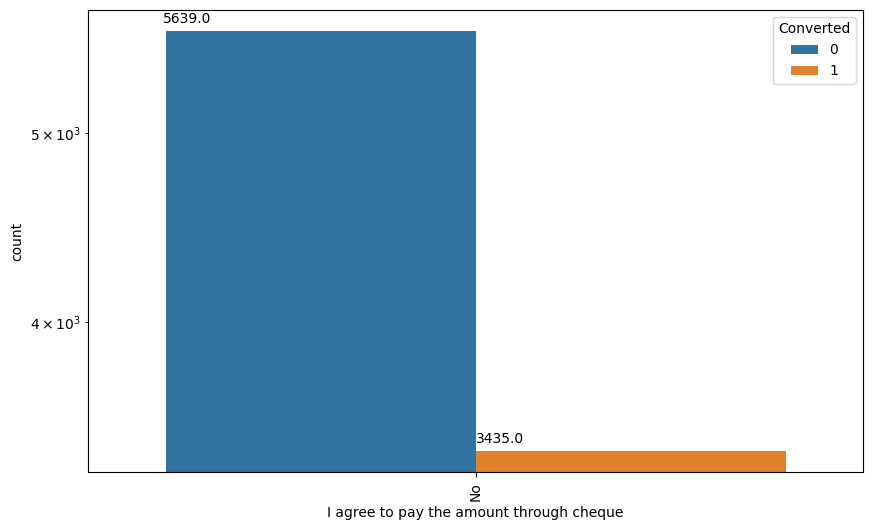

In [ ]:
plt.figure(figsize = (10,6))
ax= sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

A free copy of Mastering The Interview

In [ ]:
lead['A free copy of Mastering The Interview'].describe()

,A free copy of Mastering The Interview
count,9074
unique,2
top,No
freq,6186


In [ ]:
lead['A free copy of Mastering The Interview'].value_counts()

,count
A free copy of Mastering The Interview,
No,6186
Yes,2888


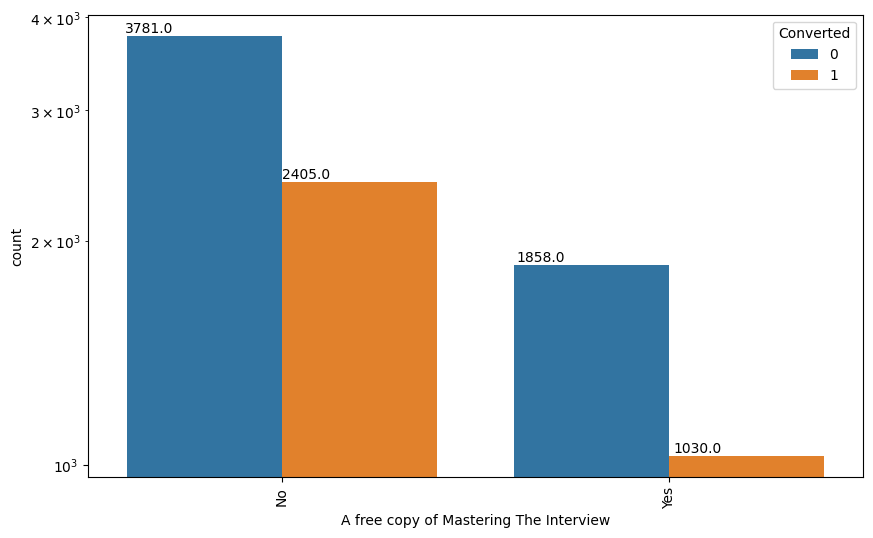

In [ ]:
plt.figure(figsize = (10,6))
ax= sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

City

In [ ]:
lead.City.describe()

,City
count,9074
unique,6
top,Mumbai
freq,6752


In [ ]:
lead.City.value_counts()

,count
City,
Mumbai,6752
Thane & Outskirts,745
Other Cities,680
Other Cities of Maharashtra,446
Other Metro Cities,377
Tier II Cities,74


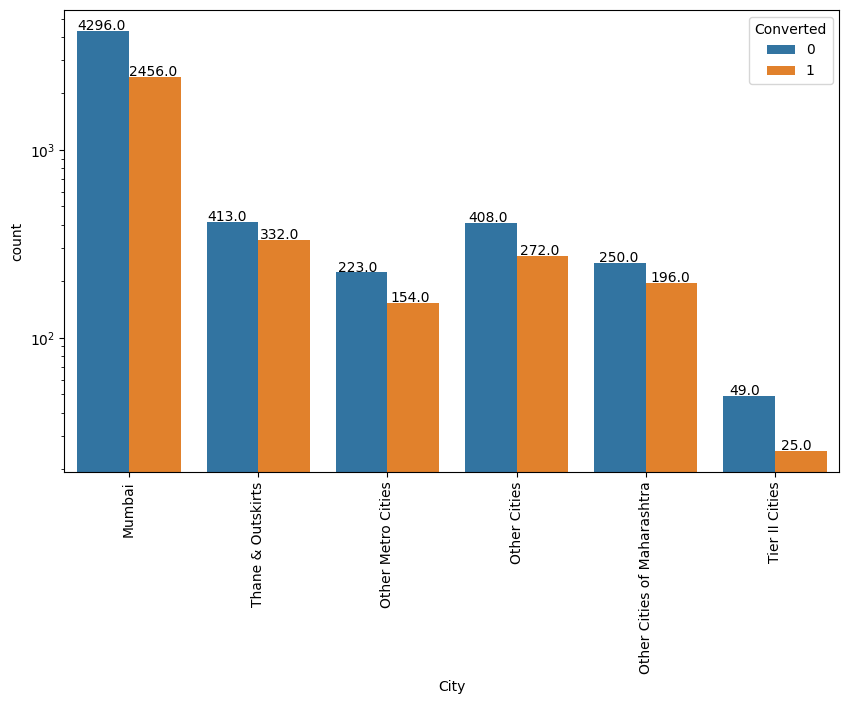

In [ ]:
plt.figure(figsize = (10,6))
ax= sns.countplot(x = "City", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

Last Notable Activity

In [ ]:
lead['Last Notable Activity'].describe()

,Last Notable Activity
count,9074
unique,16
top,Modified
freq,3267


In [ ]:
lead['Last Notable Activity'].value_counts()

,count
Last Notable Activity,
Modified,3267
Email Opened,2823
SMS Sent,2152
Page Visited on Website,318
Olark Chat Conversation,183
Email Link Clicked,173
Email Bounced,60
Unsubscribed,45
Unreachable,32


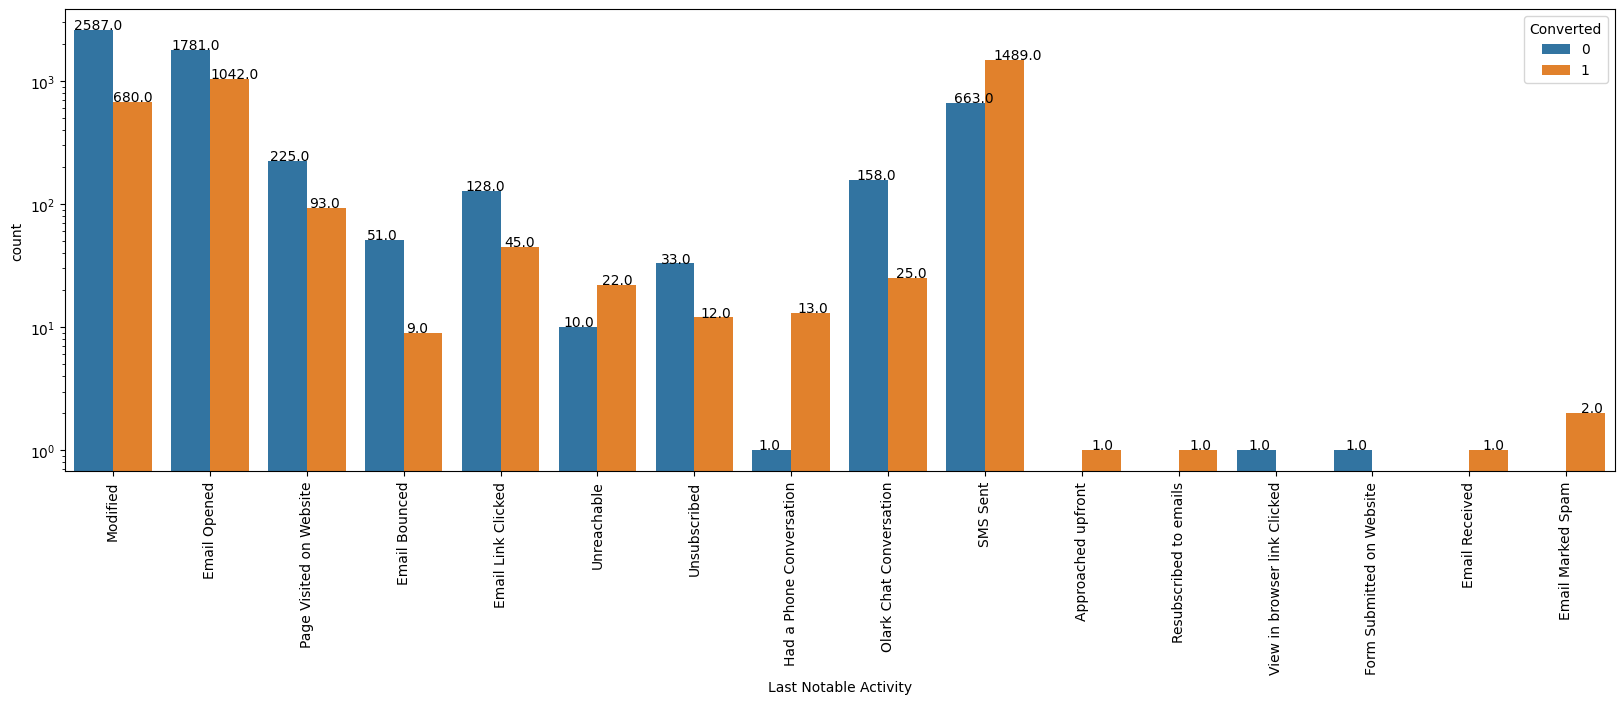

In [ ]:
plt.figure(figsize = (20,6))
ax= sns.countplot(x = "Last Notable Activity", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

Results

In [ ]:
lead = lead.drop(['What matters most to you in choosing a course','Search',
                  'Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                  'Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque',
                  'A free copy of Mastering The Interview','Country'],axis=1)

In [ ]:
print("Original Columns {} % Retained".format(round((100* len(lead.columns)/len(lead_dub.columns)),2)))

Original Columns 40.54 % Retained


In [ ]:
print("Original Data {} % Retained".format(round((len(lead) *
                                                     len(lead.columns))*100/(len(lead_dub.columns)*len(lead_dub)),2)))

Original Data 39.81 % Retained


In [ ]:
lead.shape

(9074, 15)

In [ ]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Other_Specialization,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Other_Specialization,Unemployed,Ringing,Not Sure,Mumbai,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Other_Specialization,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


Data Preparation

In [ ]:
varlist =  ['Do Not Email', 'Do Not Call']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

lead[varlist] = lead[varlist].apply(binary_map)
lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Other_Specialization,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Other_Specialization,Unemployed,Ringing,Not Sure,Mumbai,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Other_Specialization,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


In [ ]:
dummy1 = pd.get_dummies(lead[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','Lead Quality','City','Last Notable Activity']], drop_first=True)
dummy1.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,False,False,False,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,True,False,False,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [ ]:
lead = pd.concat([lead, dummy1], axis=1)
lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Other_Specialization,...,False,False,True,False,False,False,False,False,False,False
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Other_Specialization,...,False,False,False,False,False,False,False,False,False,False
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,...,False,False,False,False,False,False,False,False,False,False
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,...,False,False,True,False,False,False,False,False,False,False
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Other_Specialization,...,False,False,True,False,False,False,False,False,False,False


In [ ]:
lead = lead.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
                  'What is your current occupation','Tags','Lead Quality','City','Last Notable Activity'], axis = 1)
lead.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0.0,0,0.0,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,0,0,0,5.0,674,2.5,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,0,1,2.0,1532,2.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,0,0,1.0,305,1.0,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,0,0,1,2.0,1428,1.0,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [ ]:
lead.shape

(9074, 86)

In [ ]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = lead.drop(['Converted'], axis=1)

In [ ]:
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,0,0,5.0,674,2.5,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,0,2.0,1532,2.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,0,1.0,305,1.0,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,0,0,2.0,1428,1.0,True,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False


In [ ]:
X.shape

(9074, 85)

In [ ]:
y = lead['Converted']

In [ ]:
y.head()

,Converted
0,0
1,0
2,1
3,0
4,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=75)

In [ ]:
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3167,0,0,5.0,464,5.0,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4637,0,0,2.0,69,2.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9040,0,0,0.0,0,0.0,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
6170,0,0,3.0,1466,3.0,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
6950,0,0,2.0,310,2.0,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
X_train.shape

(6351, 85)

In [ ]:
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
5195,0,0,4.0,1298,4.0,True,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
1171,0,0,5.0,1546,5.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
764,0,0,4.0,49,4.0,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False
2261,0,0,1.0,102,1.0,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
5508,0,0,7.0,1087,6.0,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
X_test.shape

(2723, 85)

In [ ]:
y_train.head()

,Converted
3167,0
4637,0
9040,1
6170,1
6950,0


In [ ]:
y_train.shape

(6351,)

In [ ]:
y_test.head()

,Converted
5195,1
1171,1
764,1
2261,0
5508,0


In [ ]:
y_test.shape

(2723,)

Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3167,0,0,0.663417,-0.034338,1.526018,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4637,0,0,-0.424557,-0.760490,-0.148851,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9040,0,0,-1.149873,-0.887336,-1.265430,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
6170,0,0,-0.061899,1.807696,0.409439,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
6950,0,0,-0.424557,-0.317445,-0.148851,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3167,0,0,-0.909279,-0.887399,-0.413470,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4637,0,0,-1.303841,-0.888734,-1.348532,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9040,0,0,-1.566883,-0.888968,-1.971907,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
6170,0,0,-1.172321,-0.884013,-1.036845,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
6950,0,0,-1.303841,-0.887920,-1.348532,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
Converted = round((sum(lead['Converted'])/len(lead['Converted'].index))*100,2)
print("We have almost {} %  Converted rate after successful data manipulation".format(Converted))

We have almost 37.86 %  Converted rate after successful data manipulation


Model Building

XGBClassifier

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
model = XGBClassifier(base_score=0.5,
    booster='gbtree',
    callbacks=None,
    colsample_bylevel=1,
    colsample_bynode=1,
    colsample_bytree=1,
    early_stopping_rounds=None,
    enable_categorical=False,
    eval_metric=None,
    feature_types=None,
    gamma=0,
    grow_policy='depthwise',
    importance_type='gain',
    interaction_constraints=None,
    learning_rate=0.3,
    max_bin=256,
    max_cat_threshold=64,
    max_cat_to_onehot=4,
    max_delta_step=0,
    max_depth=6,
    max_leaves=0,
    min_child_weight=1,
    missing=np.nan,  # Set missing parameter to np.nan
    monotone_constraints=None,
    multi_strategy=None,
    n_estimators=100,
    n_jobs=1,
    num_parallel_tree=1,
    random_state=42,
    reg_alpha=0,
    reg_lambda=1,
    scale_pos_weight=1,
    subsample=1,
    tree_method='auto',
    validate_parameters=1,
    verbosity=None)

In [ ]:
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0,
              grow_policy='depthwise', importance_type='gain',
              interaction_constraints=None, learning_rate=0.3, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=1, num_parallel_tree=1, random_state=42, ...)

In [ ]:
predict_train = model.predict(X_train)
predict_train

array([0, 0, 0, ..., 1, 0, 1])

In [ ]:
trainaccuracy = accuracy_score(y_train,predict_train)
print('accuracy_score on train dataset : ', trainaccuracy)

accuracy_score on train dataset :  0.9691387183120769


In [187]:
from sklearn import metrics
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, predict_train )
print(confusion)

[[3912   52]
 [ 144 2243]]


In [188]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [189]:
trainsensitivity= TP / float(TP+FN)
trainsensitivity

0.9396732299958106

In [190]:
trainspecificity= TN / float(TN+FP)
trainspecificity

0.9868819374369324

In [191]:
print(FP/ float(TN+FP))

0.013118062563067608


In [192]:
print (TP / float(TP+FP))

0.9773420479302832


In [193]:
print(TN / float(TN+ FN))

0.9644970414201184


PLotting The ROC Curve

In [194]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

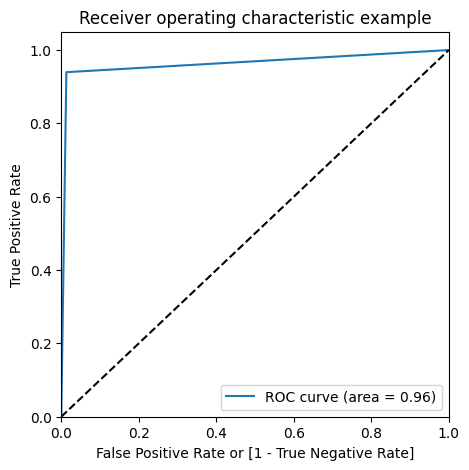

In [195]:
draw_roc(y_train,predict_train)

Precision and Recall

In [196]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train,predict_train)

0.9773420479302832

In [197]:
recall_score(y_train,predict_train)

0.9396732299958106

In [198]:
predict_test = model.predict(X_test)
print('Target on test data\n\n',predict_test)

Target on test data

 [1 1 1 ... 0 0 0]


In [199]:
confusion2 = metrics.confusion_matrix(y_test, predict_test )
print(confusion2)

[[1208  467]
 [  58  990]]


In [200]:
testaccuracy= accuracy_score(y_test,predict_test)
testaccuracy

0.8071979434447301

In [201]:

testsensitivity=TP / float(TP+FN)
testsensitivity

0.9396732299958106

In [202]:
testspecificity= TN / float(TN+FP)
testspecificity

0.9868819374369324

Final Observation

In [203]:
print("Train Data Accuracy    :{} %".format(round((trainaccuracy*100),2)))
print("Train Data Sensitivity :{} %".format(round((trainsensitivity*100),2)))
print("Train Data Specificity :{} %".format(round((trainspecificity*100),2)))
print("Test Data Accuracy     :{} %".format(round((testaccuracy*100),2)))
print("Test Data Sensitivity  :{} %".format(round((testsensitivity*100),2)))
print("Test Data Specificity  :{} %".format(round((testspecificity*100),2)))

Train Data Accuracy    :96.91 %
Train Data Sensitivity :93.97 %
Train Data Specificity :98.69 %
Test Data Accuracy     :80.72 %
Test Data Sensitivity  :93.97 %
Test Data Specificity  :98.69 %
